# MIS665 FinalProject

#### Calen Rupp "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work." 

In [252]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [253]:
df = pd.read_csv("movie_data.csv")
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

      actor_1_name                                  movie_title  \
0      CCH Pounder                                      Avatar    
1      Johnny Depp    Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                     Spectre    
3        Tom Hardy                       The Dark Knight Rises    
4      Doug Walker  Star Wars: Episode VII - The Force Awakens    

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0           886204                       4834             Wes Studi   
1           471220                      48350        Jack Davenport   
2           275868                      11700      Stephanie Sigman   
3          1144337                     106759  Joseph Gordon-Levitt   
4                8                        143                   NaN   

   facenumber_in_poster                                      plot_keywords  \
0                   0.0             avatar|future|marine|native|paraplegic   
1                   0.0  goddess|marriage ceremony|marriage proposal|pi...   
2                   1.0                bomb|espionage|sequel|spy|terrorist   
3                   0.0  deception|imprisonment|lawlessness|police offi...   
4                   0.0                                                NaN   

                                     movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...                3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...                1238.0   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...                 994.0   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...                2701.0   
4  http://www.imdb.com/title/tt5289954/?ref_=fn_t...                   NaN   

  language country content_rating       budget  title_year  \
0  English     USA          PG-13  237000000.0      2009.0   
1  English     USA          PG-13  300000000.0      2007.0   
2  English      UK          PG-13  245000000.0      2015.0   
3  English     USA          PG-13  250000000.0      2012.0   
4      NaN     NaN            NaN          NaN         NaN   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
0                   936.0         7.9          1.78                 33000  
1                  5000.0         7.1          2.35                     0  
2                   393.0         6.8          2.35                 85000  
3                 23000.0         8.5          2.35                164000  
4                    12.0         7.1           NaN                     0

#  1. Business Understanding

### Summary
* It is very difficult to predict which movies will be successful as many films with high budgets, famous actors, and lots of marketing and visibility still flop at the box office.
* It is also difficult to determine what movies are successful. Should success be based on revenue, profit, ratings, or longevity? This project will focus on IMDB score as a measure of success.
* Machine learning algorithms, which we have not covered in detail yet, have been used in efforts to predict movie success.
#### Goals
* The goal of this analysis is to determine which factors are correlated with movie success and provide some information that can be used to predict which movies will be successful.
#### Data Collection
* To predict movie success, I would collect data that included movie genre, release date, revenue, budget, critic reviews, audience scores, actor/director names, and producing studio names. 
* All of these things, I believe, would play some role in a movie's success, which could then be used to predict future movie success.

### Variables Correlated with IMDB Score

In [254]:
# correlation analysis
df.corr()

num_critic_for_reviews  duration  \
num_critic_for_reviews                   1.000000  0.255096   
duration                                 0.255096  1.000000   
director_facebook_likes                  0.181285  0.172813   
actor_3_facebook_likes                   0.270653  0.122210   
actor_1_facebook_likes                   0.188196  0.086378   
gross                                    0.479367  0.248573   
num_voted_users                          0.624062  0.313426   
cast_total_facebook_likes                0.261260  0.120732   
facenumber_in_poster                    -0.036070  0.011281   
num_user_for_reviews                     0.608311  0.327090   
budget                                   0.119344  0.073517   
title_year                               0.278143 -0.134419   
actor_2_facebook_likes                   0.281061  0.130067   
imdb_score                               0.305989  0.263406   
aspect_ratio                            -0.047757 -0.085255   
movie_facebook_likes                     0.683539  0.196343   

                           director_facebook_likes  actor_3_facebook_likes  \
num_critic_for_reviews                    0.181285                0.270653   
duration                                  0.172813                0.122210   
director_facebook_likes                   1.000000                0.120227   
actor_3_facebook_likes                    0.120227                1.000000   
actor_1_facebook_likes                    0.090849                0.249071   
gross                                     0.145867                0.307317   
num_voted_users                           0.298231                0.286308   
cast_total_facebook_likes                 0.119686                0.473242   
facenumber_in_poster                     -0.041153                0.098674   
num_user_for_reviews                      0.222571                0.229146   
budget                                    0.020808                0.047023   
title_year                               -0.061679                0.096988   
actor_2_facebook_likes                    0.119759                0.559203   
imdb_score                                0.170080                0.052275   
aspect_ratio                              0.002522               -0.002741   
movie_facebook_likes                      0.162575                0.278316   

                           actor_1_facebook_likes     gross  num_voted_users  \
num_critic_for_reviews                   0.188196  0.479367         0.624062   
duration                                 0.086378  0.248573         0.313426   
director_facebook_likes                  0.090849  0.145867         0.298231   
actor_3_facebook_likes                   0.249071  0.307317         0.286308   
actor_1_facebook_likes                   1.000000  0.153108         0.191365   
gross                                    0.153108  1.000000         0.636763   
num_voted_users                          0.191365  0.636763         1.000000   
cast_total_facebook_likes                0.951606  0.245966         0.264353   
facenumber_in_poster                     0.071430 -0.028348        -0.028697   
num_user_for_reviews                     0.143877  0.559377         0.797865   
budget                                   0.022103  0.101691         0.079030   
title_year                               0.087649  0.029602         0.008361   
actor_2_facebook_likes                   0.389688  0.261803         0.269645   
imdb_score                               0.075865  0.199242         0.412368   
aspect_ratio                            -0.019414  0.067440        -0.014139   
movie_facebook_likes                     0.134457  0.377497         0.537473   

                           cast_total_facebook_likes  facenumber_in_poster  \
num_critic_for_reviews                      0.261260             -0.036070   
duration                                    0.120732              0.011281   
director_facebook_likes          

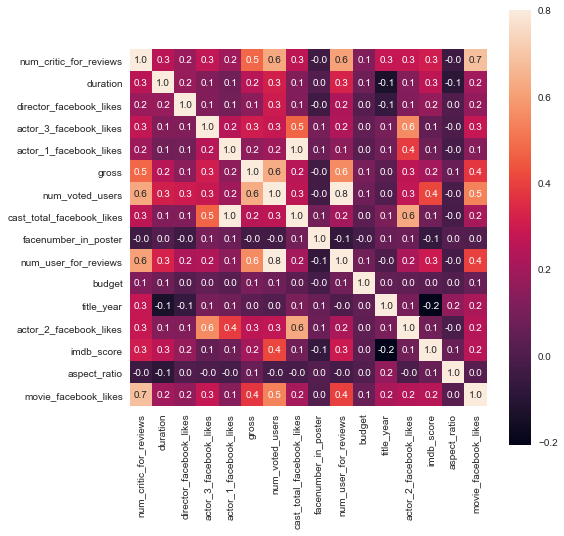

In [255]:
# correlation plot
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f");

* The category most correlated with IMDB score is the number of users who voted for the movie. 
* The number of critic reviews, number of user reviews, and duration are all moderately correlated with IMDB score.
* IMDB score is also positively correlated with gross revenue, though this is a weaker relationship (around .2).

# 2. Data Understanding

In [256]:
# basic statistics
df.describe()

num_critic_for_reviews     duration  director_facebook_likes  \
count              4955.00000  4985.000000              4897.000000   
mean                140.91443   107.350652               688.089034   
std                 121.72118    25.205444              2815.172153   
min                   1.00000     7.000000                 0.000000   
25%                  50.00000    93.000000                 7.000000   
50%                 111.00000   104.000000                49.000000   
75%                 196.00000   118.000000               197.000000   
max                 813.00000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             4978.000000             4993.000000  4.138000e+03   
mean               649.629972             6613.452433  4.870898e+07   
std               1671.240803            15074.201947  6.854273e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                136.000000              622.000000  5.517260e+06   
50%                375.500000              991.000000  2.565044e+07   
75%                637.000000            11000.000000  6.253549e+07   
max              23000.000000           640000.000000  7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     5.000000e+03                 5000.00000           4988.000000   
mean      8.427845e+04                 9775.87480              1.375902   
std       1.388915e+05                18222.59422              2.018075   
min       5.000000e+00                    0.00000              0.000000   
25%       8.921250e+03                 1439.75000              0.000000   
50%       3.467700e+04                 3125.50000              1.000000   
75%       9.678100e+04                13883.75000              2.000000   
max       1.689764e+06               656730.00000             43.000000   

       num_user_for_reviews        budget   title_year  \
count           4979.000000  4.520000e+03  4893.000000   
mean             274.510544  4.001709e+07  2002.456979   
std              378.980281  2.067952e+08    12.488917   
min                1.000000  2.180000e+02  1916.000000   
25%               66.000000  6.000000e+06  1999.000000   
50%              157.000000  2.000000e+07  2005.000000   
75%              327.500000  4.500000e+07  2011.000000   
max             5060.000000  1.221550e+10  2016.000000   

       actor_2_facebook_likes   imdb_score  aspect_ratio  movie_facebook_likes  
count             4987.000000  5000.000000   4685.000000           5000.000000  
mean              1664.591137     6.444200      2.216598           7576.342600  
std               4057.403623     1.123225      1.359334          19388.602766  
min                  0.000000     1.600000      1.180000              0.000000  
25%                286.500000     5.800000      1.850000              0.000000  
50%                599.000000     6.600000      2.350000            166.000000  
75%                919.000000     7.200000      2.350000           3000.000000  
max             137000.000000     9.500000     16.000000         349000.000000

In [257]:
# find null values
df.isnull().sum()

color                         18
director_name                103
num_critic_for_reviews        45
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        22
actor_2_name                  13
actor_1_facebook_likes         7
gross                        862
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  22
facenumber_in_poster          12
plot_keywords                145
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               287
budget                       480
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 315
movie_facebook_likes           0
dtype: int64

* There are some null values in several categories. Some null values are in important categories, such as number of reviews or gross revenue. Others are in non-essential categories, such as aspect ratio.

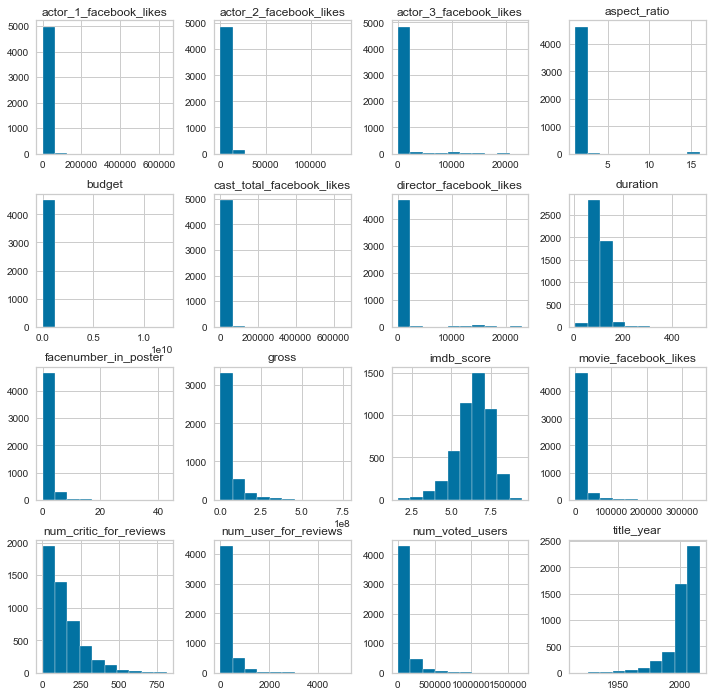

In [258]:
# histograms - check for odd values
df.hist(figsize=(12,12));

* There don't appear to be any inaccurate values such as typos

In [259]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
color                        4982 non-null object
director_name                4897 non-null object
num_critic_for_reviews       4955 non-null float64
duration                     4985 non-null float64
director_facebook_likes      4897 non-null float64
actor_3_facebook_likes       4978 non-null float64
actor_2_name                 4987 non-null object
actor_1_facebook_likes       4993 non-null float64
gross                        4138 non-null float64
genres                       5000 non-null object
actor_1_name                 4993 non-null object
movie_title                  5000 non-null object
num_voted_users              5000 non-null int64
cast_total_facebook_likes    5000 non-null int64
actor_3_name                 4978 non-null object
facenumber_in_poster         4988 non-null float64
plot_keywords                4855 non-null object
movie_imdb_link              5000 non-

### Value counts and stats for columns related to IMDB score

In [260]:
df['num_voted_users'].describe().round(0)

count       5000.0
mean       84278.0
std       138891.0
min            5.0
25%         8921.0
50%        34677.0
75%        96781.0
max      1689764.0
Name: num_voted_users, dtype: float64

In [261]:
df['num_critic_for_reviews'].describe().round(0)

count    4955.0
mean      141.0
std       122.0
min         1.0
25%        50.0
50%       111.0
75%       196.0
max       813.0
Name: num_critic_for_reviews, dtype: float64

In [262]:
df['num_user_for_reviews'].describe().round(0)

count    4979.0
mean      275.0
std       379.0
min         1.0
25%        66.0
50%       157.0
75%       328.0
max      5060.0
Name: num_user_for_reviews, dtype: float64

In [263]:
df['duration'].describe().round(0)

count    4985.0
mean      107.0
std        25.0
min         7.0
25%        93.0
50%       104.0
75%       118.0
max       511.0
Name: duration, dtype: float64

In [264]:
df['gross'].describe().round(0)

count         4138.0
mean      48708983.0
std       68542729.0
min            162.0
25%        5517260.0
50%       25650438.0
75%       62535494.0
max      760505847.0
Name: gross, dtype: float64

# 3. Data Preparation

Data preparation: Real-world datasets need to be pre-processed (e.g., cleaning, transforming) prior to formal analysis. Perform all necessary data cleaning andtransformation activities. If necessary, you need to create new variables from existing variables. See an example.

In [265]:
# drop unnecessary columns - budget information is innaccurate (some movies are listed with over 1 billion dollar budgets)
m = df.drop(['facenumber_in_poster','aspect_ratio','budget'], axis=1)
m.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

      actor_1_name                                  movie_title  \
0      CCH Pounder                                      Avatar    
1      Johnny Depp    Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                     Spectre    
3        Tom Hardy                       The Dark Knight Rises    
4      Doug Walker  Star Wars: Episode VII - The Force Awakens    

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0           886204                       4834             Wes Studi   
1           471220                      48350        Jack Davenport   
2           275868                      11700      Stephanie Sigman   
3          1144337                     106759  Joseph Gordon-Levitt   
4                8                        143                   NaN   

                                       plot_keywords  \
0             avatar|future|marine|native|paraplegic   
1  goddess|marriage ceremony|marriage proposal|pi...   
2                bomb|espionage|sequel|spy|terrorist   
3  deception|imprisonment|lawlessness|police offi...   
4                                                NaN   

                                     movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...                3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...                1238.0   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...                 994.0   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...                2701.0   
4  http://www.imdb.com/title/tt5289954/?ref_=fn_t...                   NaN   

  language country content_rating  title_year  actor_2_facebook_likes  \
0  English     USA          PG-13      2009.0                   936.0   
1  English     USA          PG-13      2007.0                  5000.0   
2  English      UK          PG-13      2015.0                   393.0   
3  English     USA          PG-13      2012.0                 23000.0   
4      NaN     NaN            NaN         NaN                    12.0   

   imdb_score  movie_facebook_likes  
0         7.9                 33000  
1         7.1                     0  
2         6.8                 85000  
3         8.5                164000  
4         7.1                     0

In [266]:
# remove underscores in column names
m.columns = m.columns.str.replace('_','')
m.head()

color       directorname  numcriticforreviews  duration  \
0  Color      James Cameron                723.0     178.0   
1  Color     Gore Verbinski                302.0     169.0   
2  Color         Sam Mendes                602.0     148.0   
3  Color  Christopher Nolan                813.0     164.0   
4    NaN        Doug Walker                  NaN       NaN   

   directorfacebooklikes  actor3facebooklikes        actor2name  \
0                    0.0                855.0  Joel David Moore   
1                  563.0               1000.0     Orlando Bloom   
2                    0.0                161.0      Rory Kinnear   
3                22000.0              23000.0    Christian Bale   
4                  131.0                  NaN        Rob Walker   

   actor1facebooklikes        gross                           genres  \
0               1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1              40000.0  309404152.0         Action|Adventure|Fantasy   
2              11000.0  200074175.0        Action|Adventure|Thriller   
3              27000.0  448130642.0                  Action|Thriller   
4                131.0          NaN                      Documentary   

        actor1name                                   movietitle  \
0      CCH Pounder                                      Avatar    
1      Johnny Depp    Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                     Spectre    
3        Tom Hardy                       The Dark Knight Rises    
4      Doug Walker  Star Wars: Episode VII - The Force Awakens    

   numvotedusers  casttotalfacebooklikes            actor3name  \
0         886204                    4834             Wes Studi   
1         471220                   48350        Jack Davenport   
2         275868                   11700      Stephanie Sigman   
3        1144337                  106759  Joseph Gordon-Levitt   
4              8                     143                   NaN   

                                        plotkeywords  \
0             avatar|future|marine|native|paraplegic   
1  goddess|marriage ceremony|marriage proposal|pi...   
2                bomb|espionage|sequel|spy|terrorist   
3  deception|imprisonment|lawlessness|police offi...   
4                                                NaN   

                                       movieimdblink  numuserforreviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...             3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...             1238.0   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...              994.0   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...             2701.0   
4  http://www.imdb.com/title/tt5289954/?ref_=fn_t...                NaN   

  language country contentrating  titleyear  actor2facebooklikes  imdbscore  \
0  English     USA         PG-13     2009.0                936.0        7.9   
1  English     USA         PG-13     2007.0               5000.0        7.1   
2  English      UK         PG-13     2015.0                393.0        6.8   
3  English     USA         PG-13     2012.0              23000.0        8.5   
4      NaN     NaN           NaN        NaN                 12.0        7.1   

   moviefacebooklikes  
0               33000  
1                   0  
2               85000  
3              164000  
4                   0

In [267]:
# view nulls
m.isnull().sum()

color                      18
directorname              103
numcriticforreviews        45
duration                   15
directorfacebooklikes     103
actor3facebooklikes        22
actor2name                 13
actor1facebooklikes         7
gross                     862
genres                      0
actor1name                  7
movietitle                  0
numvotedusers               0
casttotalfacebooklikes      0
actor3name                 22
plotkeywords              145
movieimdblink               0
numuserforreviews          21
language                   12
country                     5
contentrating             287
titleyear                 107
actor2facebooklikes        13
imdbscore                   0
moviefacebooklikes          0
dtype: int64

In [268]:
m1 = m.dropna()
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4035 entries, 0 to 4998
Data columns (total 25 columns):
color                     4035 non-null object
directorname              4035 non-null object
numcriticforreviews       4035 non-null float64
duration                  4035 non-null float64
directorfacebooklikes     4035 non-null float64
actor3facebooklikes       4035 non-null float64
actor2name                4035 non-null object
actor1facebooklikes       4035 non-null float64
gross                     4035 non-null float64
genres                    4035 non-null object
actor1name                4035 non-null object
movietitle                4035 non-null object
numvotedusers             4035 non-null int64
casttotalfacebooklikes    4035 non-null int64
actor3name                4035 non-null object
plotkeywords              4035 non-null object
movieimdblink             4035 non-null object
numuserforreviews         4035 non-null float64
language                  4035 non-null ob

* After dropping null values, there are now 3,796 entries of the original 5,000. This is still a sufficient number for performing this analysis.

In [269]:
m1.head()

color       directorname  numcriticforreviews  duration  \
0  Color      James Cameron                723.0     178.0   
1  Color     Gore Verbinski                302.0     169.0   
2  Color         Sam Mendes                602.0     148.0   
3  Color  Christopher Nolan                813.0     164.0   
5  Color     Andrew Stanton                462.0     132.0   

   directorfacebooklikes  actor3facebooklikes        actor2name  \
0                    0.0                855.0  Joel David Moore   
1                  563.0               1000.0     Orlando Bloom   
2                    0.0                161.0      Rory Kinnear   
3                22000.0              23000.0    Christian Bale   
5                  475.0                530.0   Samantha Morton   

   actor1facebooklikes        gross                           genres  \
0               1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1              40000.0  309404152.0         Action|Adventure|Fantasy   
2              11000.0  200074175.0        Action|Adventure|Thriller   
3              27000.0  448130642.0                  Action|Thriller   
5                640.0   73058679.0          Action|Adventure|Sci-Fi   

        actor1name                                 movietitle  numvotedusers  \
0      CCH Pounder                                    Avatar          886204   
1      Johnny Depp  Pirates of the Caribbean: At World's End          471220   
2  Christoph Waltz                                   Spectre          275868   
3        Tom Hardy                     The Dark Knight Rises         1144337   
5     Daryl Sabara                               John Carter          212204   

   casttotalfacebooklikes            actor3name  \
0                    4834             Wes Studi   
1                   48350        Jack Davenport   
2                   11700      Stephanie Sigman   
3                  106759  Joseph Gordon-Levitt   
5                    1873          Polly Walker   

                                        plotkeywords  \
0             avatar|future|marine|native|paraplegic   
1  goddess|marriage ceremony|marriage proposal|pi...   
2                bomb|espionage|sequel|spy|terrorist   
3  deception|imprisonment|lawlessness|police offi...   
5  alien|american civil war|male nipple|mars|prin...   

                                       movieimdblink  numuserforreviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...             3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...             1238.0   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...              994.0   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...             2701.0   
5  http://www.imdb.com/title/tt0401729/?ref_=fn_t...              738.0   

  language country contentrating  titleyear  actor2facebooklikes  imdbscore  \
0  English     USA         PG-13     2009.0                936.0        7.9   
1  English     USA         PG-13     2007.0               5000.0        7.1   
2  English      UK         PG-13     2015.0                393.0        6.8   
3  English     USA         PG-13     2012.0              23000.0        8.5   
5  English     USA         PG-13     2012.0                632.0        6.6   

   moviefacebooklikes  
0               33000  
1                   0  
2               85000  
3              164000  
5               24000

In [270]:
pd.set_option('display.max_columns', None)

# 4. Business Intelligence

In [271]:
# ignore FutureWarnings
# from https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Distribution of IMDB Scores

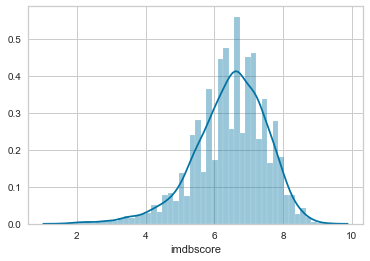

In [272]:
# distpolot
sns.distplot(m1.imdbscore);

* The majority of movies have an IMDB score in the range of 5 to 8.

### IMDB Score and Number of Users who Voted

In [273]:
# plotly scatterplot - relationship between IMDB score and number of people who voted for the movie
px.scatter(m1, x="imdbscore", y="numvotedusers", trendline='ols', hover_name='movietitle')

* Movies with high IMDB scores have more people who voted for the movie. A select few movies have significantly more votes.

### IMDB Score and Gross Revenue

In [274]:
# IMDB score in relation to gross revenue
px.scatter(m1, x="imdbscore", y="gross", trendline='ols', hover_name='movietitle', hover_data=['titleyear'])

* There is a positive relationship between the movie's Gross Revenue and its IMDB score, though it is not a very strong relationship

### IMDB Score and Critic Reviews

In [275]:
# Relationship between IMDB score and number of critic reviews
px.scatter(m1, x="imdbscore", y="numcriticforreviews", trendline='ols', hover_name='movietitle')

* A movie's IMDB score is moderately correlated with the number of critic reviews. 

### IMDB Score and User Reviews

In [276]:
# IMDB score and number of user reviews
px.scatter(m1, x="imdbscore", y="numuserforreviews", trendline='ols', hover_name='movietitle')

* The number of users who review a movies is also correlated with its IMDB score. Most movies with over 1,000 user reviews have an IMDB score above 6.

### Critic Reviews and User Reviews

In [277]:
# number of critic reviews and number of user reviews
px.scatter(m1, x="numcriticforreviews", y="numuserforreviews", color="imdbscore", 
           color_continuous_scale=px.colors.sequential.Viridis, trendline='ols', hover_name='imdbscore')

# color scheme code from:
# https://plot.ly/python/colorscales/

* The number of user reviews and critic reviews are moderately correlated with each other, which could be partly responsible for their similar relationship to IMDB score. The color scale is not clear on whether more reviews lead to a better IMDB score, but it is worth noting that there are very few poor IMDB scores with many reviews.

### IMDB Score and Movie Duration

In [278]:
# Relationship between IMDB score and movie duration
px.scatter(m1, x="imdbscore", y="duration", trendline='ols', hover_name='movietitle')

* Duration is moderately correlated with IMDB score as well. Longer movies tend to have better IMDB scores. This could be impacted by the fact that the average movie length is about two hours, but there are more movies over 2.5 hours than there are under 1.5 hours.

### IMDB Score and Year of Movie Release

In [279]:
# IMDB score in relation to year of movie release
px.scatter(m1, x="imdbscore", y="titleyear", color="imdbscore", 
           color_continuous_scale=px.colors.sequential.Viridis, trendline='ols', hover_name='movietitle')

* IMDB score is actually negatively related to the year a movie was released. This is an interesting correlation, though it may not have a real impact on this analysis. 
* There are only a handful of movies in this dataset from before 1960. There were fewer movies at that time, but movies that were not great were most likely forgotten about, never receiving an IMDB score. With only good movies that have stood the test of time receiving an IMDB score, this skews the distribution. After about 1980, there began to be some bad scores to even out the data. This makes sense as IMDB was launched in 1990.

In [280]:
new = m1[m1.titleyear > 1989]
new.head()

color       directorname  numcriticforreviews  duration  \
0  Color      James Cameron                723.0     178.0   
1  Color     Gore Verbinski                302.0     169.0   
2  Color         Sam Mendes                602.0     148.0   
3  Color  Christopher Nolan                813.0     164.0   
5  Color     Andrew Stanton                462.0     132.0   

   directorfacebooklikes  actor3facebooklikes        actor2name  \
0                    0.0                855.0  Joel David Moore   
1                  563.0               1000.0     Orlando Bloom   
2                    0.0                161.0      Rory Kinnear   
3                22000.0              23000.0    Christian Bale   
5                  475.0                530.0   Samantha Morton   

   actor1facebooklikes        gross                           genres  \
0               1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1              40000.0  309404152.0         Action|Adventure|Fantasy   
2              11000.0  200074175.0        Action|Adventure|Thriller   
3              27000.0  448130642.0                  Action|Thriller   
5                640.0   73058679.0          Action|Adventure|Sci-Fi   

        actor1name                                 movietitle  numvotedusers  \
0      CCH Pounder                                    Avatar          886204   
1      Johnny Depp  Pirates of the Caribbean: At World's End          471220   
2  Christoph Waltz                                   Spectre          275868   
3        Tom Hardy                     The Dark Knight Rises         1144337   
5     Daryl Sabara                               John Carter          212204   

   casttotalfacebooklikes            actor3name  \
0                    4834             Wes Studi   
1                   48350        Jack Davenport   
2                   11700      Stephanie Sigman   
3                  106759  Joseph Gordon-Levitt   
5                    1873          Polly Walker   

                                        plotkeywords  \
0             avatar|future|marine|native|paraplegic   
1  goddess|marriage ceremony|marriage proposal|pi...   
2                bomb|espionage|sequel|spy|terrorist   
3  deception|imprisonment|lawlessness|police offi...   
5  alien|american civil war|male nipple|mars|prin...   

                                       movieimdblink  numuserforreviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...             3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...             1238.0   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...              994.0   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...             2701.0   
5  http://www.imdb.com/title/tt0401729/?ref_=fn_t...              738.0   

  language country contentrating  titleyear  actor2facebooklikes  imdbscore  \
0  English     USA         PG-13     2009.0                936.0        7.9   
1  English     USA         PG-13     2007.0               5000.0        7.1   
2  English      UK         PG-13     2015.0                393.0        6.8   
3  English     USA         PG-13     2012.0              23000.0        8.5   
5  English     USA         PG-13     2012.0                632.0        6.6   

   moviefacebooklikes  
0               33000  
1                   0  
2               85000  
3              164000  
5               24000

In [281]:
# Movies released in 1990 and newer
px.scatter(new, x="imdbscore", y="titleyear", color="imdbscore", 
           color_continuous_scale=px.colors.sequential.Viridis, trendline='ols', hover_name='movietitle')

* There is almost no correlation when excluding all years prior to the launch of IMDB.

### IMDB Score by Director Name

In [282]:
m1.groupby('directorname').imdbscore.mean().sort_values(ascending=False).head()

directorname
Akira Kurosawa     8.7
Charles Chaplin    8.6
Damien Chazelle    8.5
Ron Fricke         8.5
Majid Majidi       8.5
Name: imdbscore, dtype: float64

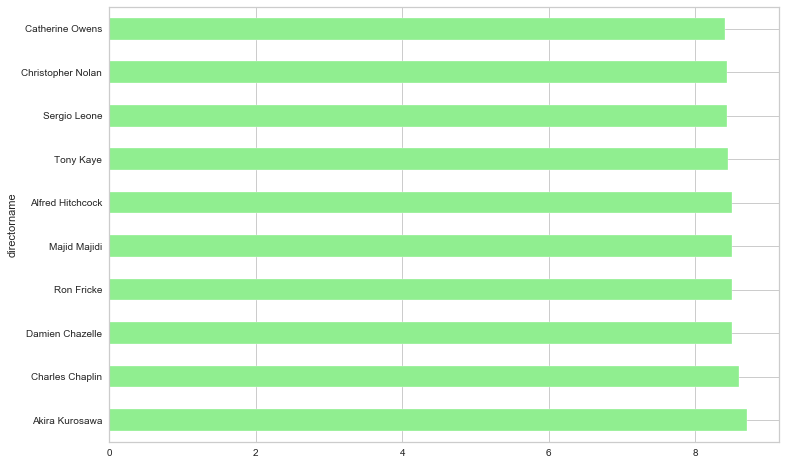

In [283]:
# Top 10 directors by average IMDB score
m1.groupby('directorname').imdbscore.mean().sort_values(ascending=False).head(10).plot(
    kind = 'barh', color = 'lightgreen', figsize=(12,8));

* These are the top 10 directors by IMDB score. Akira Kurosawa is the director with the highest average IMDB score. 

In [284]:
m1.groupby('directorname').imdbscore.mean().sort_values().head()

directorname
Vondie Curtis-Hall    2.1
Alex Zamm             2.3
Roger Christian       2.4
Jason Friedberg       2.6
Aaron Seltzer         2.7
Name: imdbscore, dtype: float64

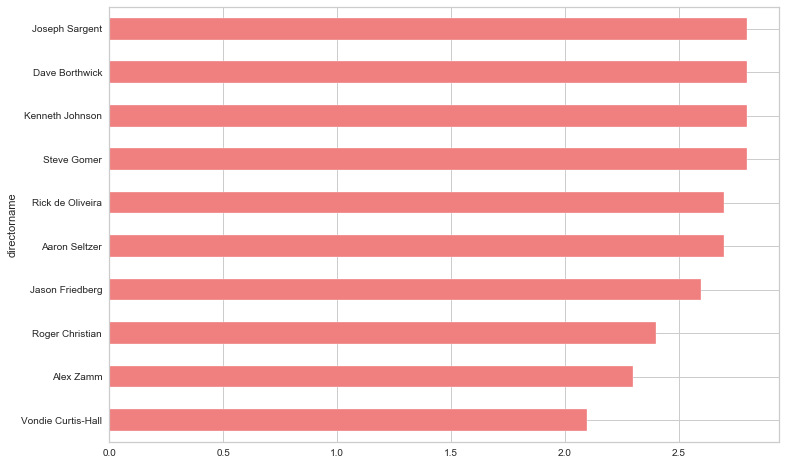

In [285]:
# Bottom 10 directors by IMDB score
m1.groupby('directorname').imdbscore.mean().sort_values().head(10).plot(kind='barh', color = 'lightcoral', figsize=(12,8));

* Vondie Curtis-Hall has the lowest average IMDB score among directors in this dataset. Directors play a role in how movies turn out, though genre probably plays a role too as many directors stick to only a few genres.

### IMDB Score and Genre

In [286]:
genre = pd.DataFrame(df.genres.str.split('|').tolist(), index=df.imdb_score).stack()
genre = genre.reset_index()[[0, 'imdb_score']] # genres variable is currently labeled 0
genre.columns = ['genres', 'imdb_score'] # renaming genres
genre.head()

genres  imdb_score
0     Action         7.9
1  Adventure         7.9
2    Fantasy         7.9
3     Sci-Fi         7.9
4     Action         7.1

In [287]:
len(genre)

14411

In [288]:
# Count of movies in genre - top 5
genre.groupby('genres').count().sort_values(by='imdb_score', ascending=False).head(10)

imdb_score
genres               
Drama            2569
Comedy           1859
Thriller         1397
Action           1150
Romance          1101
Adventure         923
Crime             879
Sci-Fi            614
Fantasy           609
Horror            555

In [289]:
# Count of movies in genre - bottom 5
genre.groupby('genres').count().sort_values(by='imdb_score').head(10)

imdb_score
genres                 
Game-Show             1
Reality-TV            2
News                  3
Short                 5
Film-Noir             6
Western              96
Documentary         119
Musical             132
Sport               182
History             207

In [290]:
genre.groupby('genres').imdb_score.mean().sort_values(ascending=False).head(10)

genres
Film-Noir      7.633333
News           7.533333
Documentary    7.176471
Biography      7.150171
History        7.083575
War            7.070423
Drama          6.765551
Western        6.716667
Sport          6.606044
Animation      6.576033
Name: imdb_score, dtype: float64

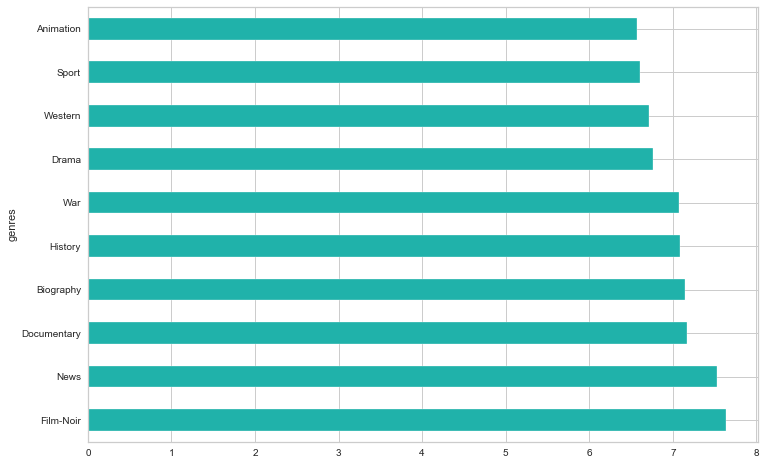

In [291]:
# Top 10 Genres
genre.groupby('genres').imdb_score.mean().sort_values(ascending=False).head(10).plot(
    kind='barh', color = 'lightseagreen', figsize=(12,8));

* Film-Noir has the highest average IMDB score at 7.63 (but only 6 movies are in this category), followed closely by News (3). Many of the top genres are generally based on true stories - News, Documentary, Biography, War. The more popular genres tend to fall towards the middle of the average IMDB ratings. 

In [292]:
genre.groupby('genres').imdb_score.mean().sort_values().head(10)

genres
Game-Show     2.900000
Reality-TV    4.750000
Horror        5.855495
Comedy        6.193491
Action        6.239739
Family        6.243670
Sci-Fi        6.284365
Fantasy       6.306404
Thriller      6.321045
Short         6.380000
Name: imdb_score, dtype: float64

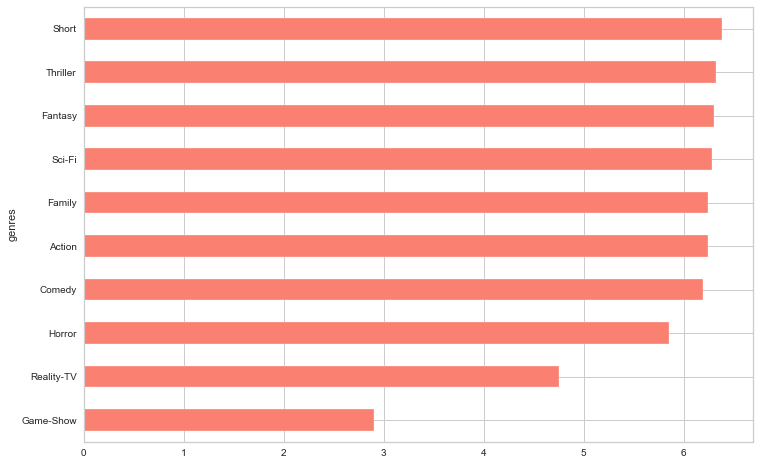

In [293]:
# Bottom 10 Genres by average IMDB score
genre.groupby('genres').imdb_score.mean().sort_values().head(10).plot(kind='barh', color = 'salmon', figsize=(12,8));

* The Game-Show genre has the worst average IMDB score by far at just 2.9 - though there is only one movie in this category
* Reality TV movies (2) also have a poor average IMDB score.
* Genres such as Comedy and Action are very popular with many great movies, and many terrible movies. As a result, the average IMDB score of these categories is fairly low - the scores fall just on the lower side of the score distribution.
* This shows that with enough data points, the average IMDB score will normalize

# 5. Correlation Analysis

In [294]:
import pingouin as pg

In [295]:
# Test for normality of the distribution
pg.normality(m1['imdbscore']).round(3)

W  pval  normal
imdbscore  0.972   0.0   False

* The data is not normally distributed

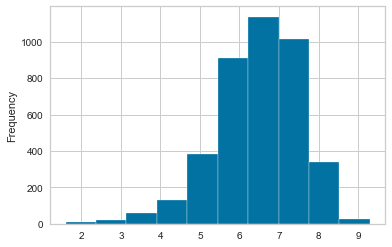

In [296]:
# distribution of IMDB scores
m1['imdbscore'].plot('hist');

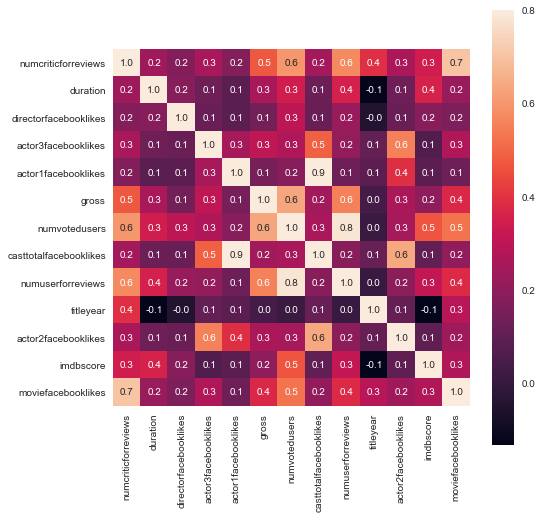

In [297]:
# correlation plot again
plt.figure(figsize=(8,8))
sns.heatmap(m1.corr(), vmax=.8, square=True, annot=True, fmt=".1f");

### IMDB Score and Number of Users who Voted

In [298]:
pg.corr(x=m1['imdbscore'], y=m1['numvotedusers'])

n      r         CI95%     r2  adj_r2          p-val       BF10  \
pearson  4035  0.465  [0.44, 0.49]  0.217   0.216  5.705978e-216  7.31e+211   

         power  
pearson    1.0

* The number of users who voted for a movie is significantly correlated to IMDB score due to the low p-value

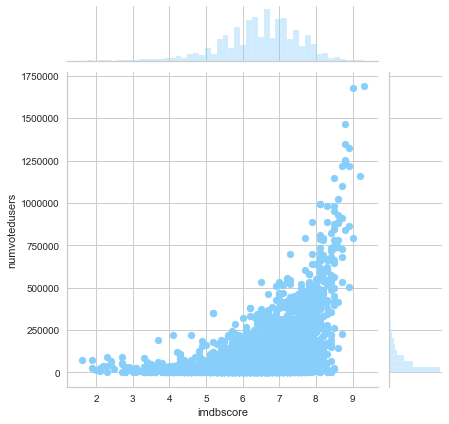

In [299]:
sns.jointplot("imdbscore", "numvotedusers", m1, color="lightskyblue");

### IMDB Score and Critic Reviews

In [300]:
pg.corr(x=m1['imdbscore'], y=m1['numcriticforreviews'])

n      r         CI95%     r2  adj_r2          p-val       BF10  \
pearson  4035  0.341  [0.31, 0.37]  0.117   0.116  1.083336e-110  5.91e+106   

         power  
pearson    1.0

* The number of critic reviews is highly correlated with IMDB score

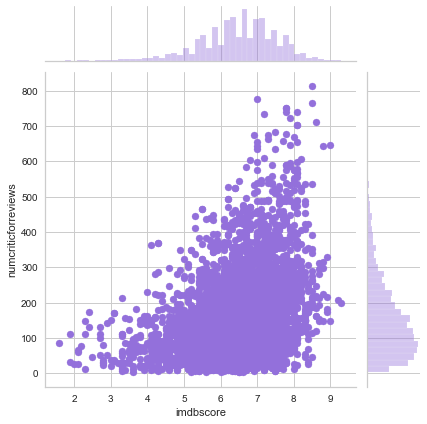

In [301]:
sns.jointplot("imdbscore", "numcriticforreviews", m1, color="mediumpurple");

### IMDB Score and User Reviews

In [302]:
pg.corr(x=m1['imdbscore'], y=m1['numuserforreviews'])

n      r         CI95%     r2  adj_r2         p-val       BF10  \
pearson  4035  0.314  [0.29, 0.34]  0.099   0.098  5.903081e-93  1.203e+89   

         power  
pearson    1.0

* The number of user reviews is highly correlated with IMDB score

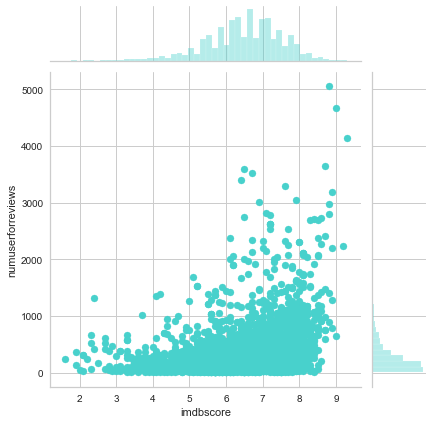

In [303]:
sns.jointplot("imdbscore", "numuserforreviews", m1, color="mediumturquoise");

### IMDB Score and Movie Length

In [304]:
pg.corr(x=m1['imdbscore'], y=m1['duration'])

n      r         CI95%    r2  adj_r2          p-val        BF10  \
pearson  4035  0.361  [0.33, 0.39]  0.13    0.13  1.538594e-124  3.874e+120   

         power  
pearson    1.0

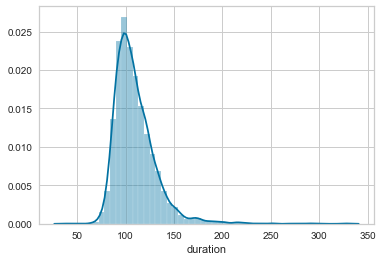

In [305]:
# Movie duration distribution
sns.distplot(m1.duration);

* Movie length is highly correlated with IMDB score. Generally, the longer the movie, the higher its IMDB score will be

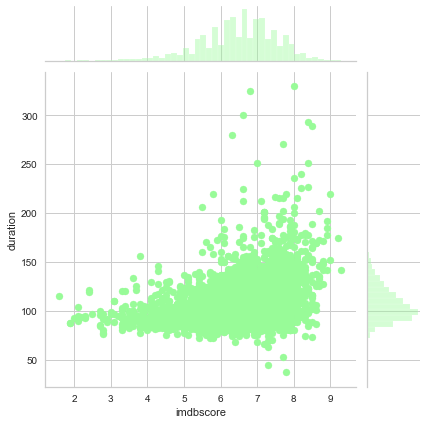

In [306]:
sns.jointplot("imdbscore", "duration", m1, color="palegreen");

### IMDB Score and Facebook Likes

In [307]:
pg.corr(x=m1['imdbscore'], y=m1['moviefacebooklikes'])

n      r        CI95%     r2  adj_r2         p-val       BF10  \
pearson  4035  0.275  [0.25, 0.3]  0.075   0.075  1.036154e-70  8.032e+66   

         power  
pearson    1.0

* The number of Facebook likes a movie gets is highly correlated with its IMDB score based on the low p-value.

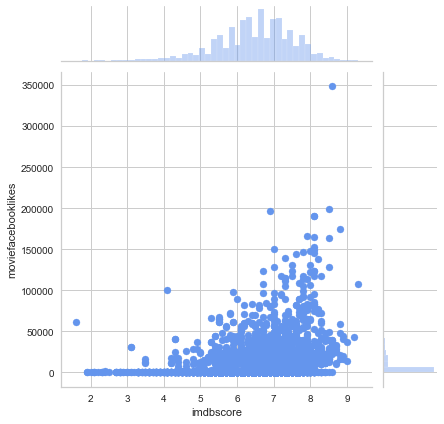

In [308]:
sns.jointplot("imdbscore", "moviefacebooklikes", m1, color="cornflowerblue");

## Correlation Among Other Variables

In [309]:
corr = m1[['movietitle','numcriticforreviews','numuserforreviews','duration','numvotedusers','gross','moviefacebooklikes']]
corr.head()

movietitle  numcriticforreviews  \
0                                    Avatar                 723.0   
1  Pirates of the Caribbean: At World's End                 302.0   
2                                   Spectre                 602.0   
3                     The Dark Knight Rises                 813.0   
5                               John Carter                 462.0   

   numuserforreviews  duration  numvotedusers        gross  moviefacebooklikes  
0             3054.0     178.0         886204  760505847.0               33000  
1             1238.0     169.0         471220  309404152.0                   0  
2              994.0     148.0         275868  200074175.0               85000  
3             2701.0     164.0        1144337  448130642.0              164000  
5              738.0     132.0         212204   73058679.0               24000

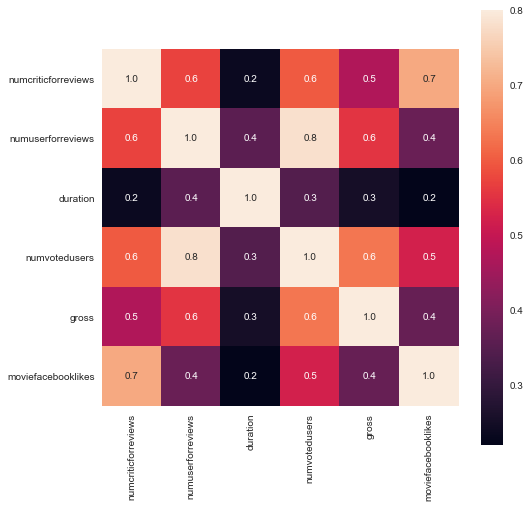

In [310]:
plt.figure(figsize=(8,8))
sns.heatmap(corr.corr(), vmax=.8, square=True, annot=True, fmt=".1f");

* Number of Facebook Likes for a movie is highly correlated with Number of Critic Reviews
* Number of Critic Reviews is highly correlated with both Number of User Reviews and Number of Votes
* Number of Critic Reviews is also highly correlated with Gross Revenue
* Gross Revenue is most strongly correlated with the Number of Votes

### Number of Votes and Gross Revenue

In [311]:
pg.corr(x=corr['numvotedusers'], y=corr['gross'])

n      r         CI95%     r2  adj_r2  p-val BF10  power
pearson  4035  0.633  [0.61, 0.65]  0.401     0.4    0.0  inf    1.0

* There is a very strong correlation between Gross and Number of Votes

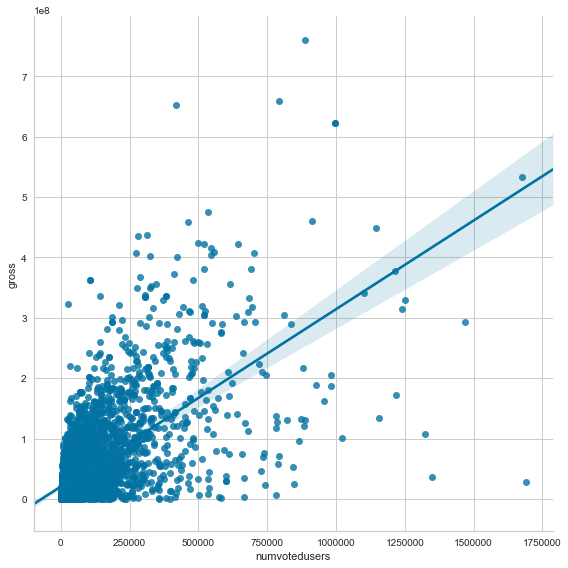

In [312]:
sns.lmplot("numvotedusers", "gross", corr, height=8);

* The more votes a movie gets, the higher its Gross Revenue tends to be. Movies with more votes have been seen by more people, so this makes sense.

### Critic Reviews and Gross Revenue

In [313]:
pg.corr(x=corr['numcriticforreviews'], y=corr['gross'])

n      r        CI95%     r2  adj_r2          p-val        BF10  \
pearson  4035  0.472  [0.45, 0.5]  0.223   0.222  4.242416e-223  9.612e+218   

         power  
pearson    1.0

* There is a strong correlation between Critic Reviews and Gross

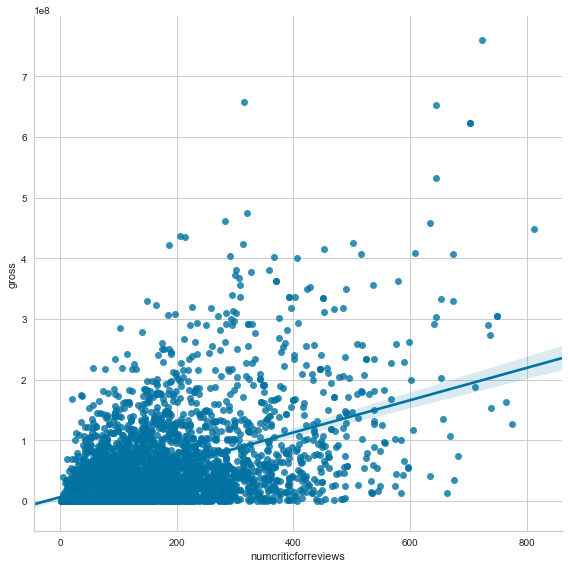

In [314]:
sns.lmplot("numcriticforreviews", "gross", corr, height=8);

* Movies with more Critic Reviews tend to Gross more money. The more "professionals" who write about a movie, the more likely people are to go see it.

In [315]:
pg.corr(x=corr['numcriticforreviews'], y=corr['numuserforreviews'])

n      r         CI95%     r2  adj_r2  p-val BF10  power
pearson  4035  0.572  [0.55, 0.59]  0.327   0.326    0.0  inf    1.0

* Critic Reviews are highly correlated with User Reviews

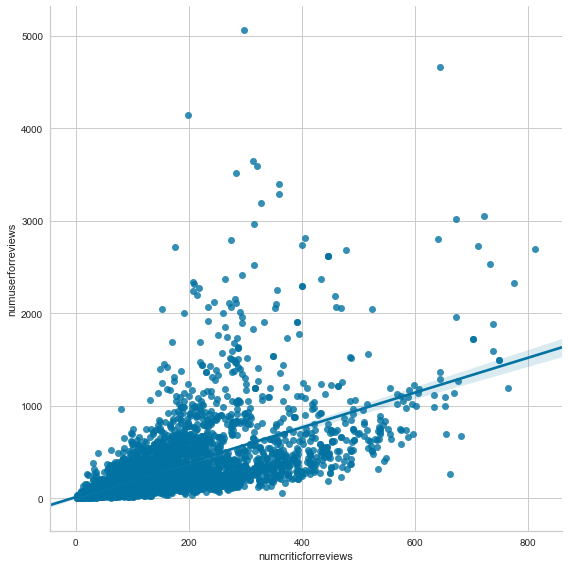

In [316]:
sns.lmplot("numcriticforreviews", "numuserforreviews", corr, height=8);

* More Critic Reviews generally corresponds with more User Reviews.

In [317]:
pg.corr(x=corr['numcriticforreviews'], y=corr['numvotedusers'])

n      r         CI95%     r2  adj_r2  p-val BF10  power
pearson  4035  0.599  [0.58, 0.62]  0.359   0.359    0.0  inf    1.0

* Critic reviews are very highly correlated with User Votes as the p-value is a perfect 0.0

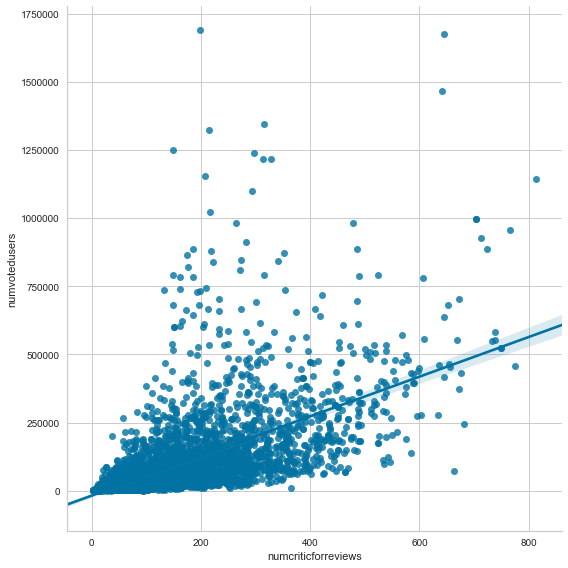

In [318]:
sns.lmplot("numcriticforreviews", "numvotedusers", corr, height=8);

* The more Critic Reviews there are for a movie, the more User Votes there tend to be.

In [319]:
pg.corr(x=corr['numcriticforreviews'], y=corr['moviefacebooklikes'])

n      r         CI95%     r2  adj_r2  p-val BF10  power
pearson  4035  0.702  [0.69, 0.72]  0.492   0.492    0.0  inf    1.0

* Critic Reviews are very highly correlated with Movie Facebook Likes

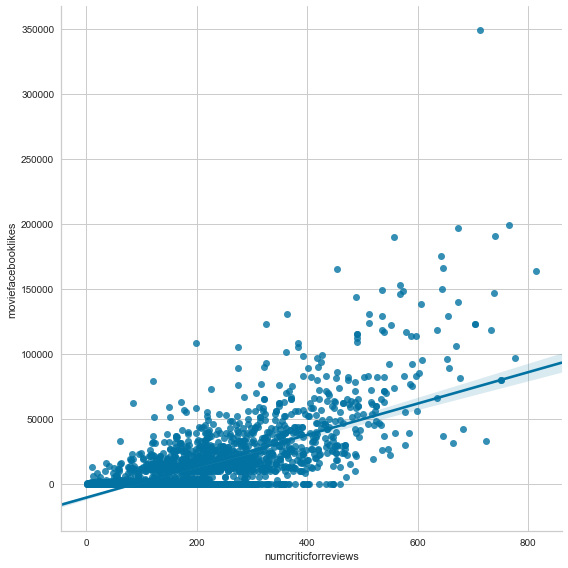

In [320]:
sns.lmplot("numcriticforreviews", "moviefacebooklikes", corr, height=8);

* The more Critic Reviews a movie has, the more Facebook Likes it will have, in general. 

# 6. Storytelling

### Correlation with IMDB

* Predicting movie success is very difficult. There are so many factors that go into it, and not all of them can be covered with this dataset
* To recap, a movie's IMDB score is most strongly correlated with the number of user votes, number of critic reviews, number of user reviews, duration, number of Facebook likes, and gross revenue.
* IMDB uses a weighted average rating system to determine scores, though how their scores are weighted is not public knowledge.
* In my experience, people will often vote on IMDB if they have a strong opinion about a movie, either positively or negatively. If a movie has several thousand votes, it means that the movie was successful in reaching a wide audience.
* Critic reviews are also highly correlated with IMDB score. It makes sense that IMDB would use critic reviews as a component of their scoring system. If a movie has hundreds of critic reviews, it means that a large audience is interested in what critics think about a specific movie. 
* User reviews are helpful in determining IMDB score as well. Again, the more user reviews a movie has, the more people have watched it. The goal of most movies is to convince as many people to watch it as possible because that drives revenue. User reviews, if positive, will convince others to watch it as well.
* However, just because a movie has thousands of reviews doesn't necessarily mean that the IMDB score will be high. For example, "Star Wars Episode I" has over 3,500 user reviews, yet its IMDB score is only 6.5. Granted, many people probably left negative reviews about the movie. This works the other way around too - "The Other Dream Team" has an IMDB score of 8.4, but only 9 user reviews. This shows that other factors must play a more important role in determining IMDB score. 
* Duration is another aspect of a movie that is correlated with IMDB score. The majority of movies last somewhere around 2 hours, maybe slightly less. Some movies are shorter, but as the distribution of duration showed, there is a tail towards the longer duration end of the distribution. 
* Facebook likes are another aspect that reflect the popularity of a movie. Since good movies tend to be more popular, this will be reflected in social media statistics.
* Gross revenue is also correlated with IMDB score, though this is the weakest correlation of the predictors I have included in this section. The highest rated movie on IMDB is The Shawshank Redemption which grossed only 28 million dollars. This is a '90s movie that did not do incredibly well at the box office, but eventually became a cult classic. This is the case for many movies that did not gain critical acclaim at the time of their release. Streaming services, and movie rentals before that, helped many movies gain popularity months or years after its initial release. Some high-grossing movies such as "The Dark Knight" and "The Avengers" also have very high IMDB scores though.
* Other factors such as actor and director facebook likes have some correlation with IMDB score, but probably do not factor in as much.
* The director of a particular movie plays a role in movie success, though that is difficult to quantify. The average person may know only a few directors, though that doesn't mean others can't be successful. A director's role is more involved with creative aspects of a movie, such as casting and stylistic choices. These definitely play a role in movie success, so directors with high average IMDB scores are very skilled at delivering movies that their audience will enjoy.
* When looking at Movie Genre, Dramas appear to be the most successful when comparing the number of movies and average IMDB score. Over 2,500 movies contain the Drama classification with an average score of 6.7.
* Most popular movie genres have an average IMDB rating somewhere between 6.0 - 6.7, proving that the larger the sample size, the more a genre will regress to the mean. Genres with the highest and lowest average ratings only contain a handful of movies in the dataset. 

### Correlation of Predictors among Each Other

* Number of Votes is highly correlated with Gross Revenue. The amount of votes a movie has typically follows the amount of people who have seen the movie. With newer movies, that likely indicates that many people paid to see the movie in theaters, which increases revenue.
* Likewise, Gross Revenue is highly correlated with Critic Reviews. As noted above, fewer critics would be reviewing a movie if there was not a substantial audience - more critic reviews means more people will want to see the movie (provided the reviews are generally positive).
* Critic Reviews are of course correlated with User Reviews. Critics write reviews --> People watch movie --> People write reviews
* Critic Reviews are also correlated with user votes in much the same way as with user reviews.
* Facebook likes are also correlated with Critic Reviews. Popularity is a huge factor in many of these predictors. A movie that is well-liked will be talked about across multiple online platforms.

### Conclusion

* To conclude, the best predictors of movie success (IMDB score) are user votes, critic reviews, user reviews, duration, Facebook likes, and revenue.
* To be successful, a movie needs to be broadcast to as wide of an audience as possible. Getting a movie into theaters nationwide will definitely jumpstart this effort. In addition, those in charge should be willing to get the movie on Netflix, Hulu, Amazon Prime Video, and other such streaming platforms to gain the massive audiences that are offered there. 
* Marketing must not be overlooked. Unless a movie is just terrible, it will likely garner decent reviews. Therefore, marketing is a necessary expense to generate interest.
* To increase the success rate, a movie should hire a well-known, successful director with a history of IMDB success.
* A popular, well-liked genre such as Drama should also be chosen. IMDB scores reflect a general enjoyment of drama movies, which will lead to success if done correctly. 

# 7. Regression

In [321]:
#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

# model validation
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [322]:
m1.head()

color       directorname  numcriticforreviews  duration  \
0  Color      James Cameron                723.0     178.0   
1  Color     Gore Verbinski                302.0     169.0   
2  Color         Sam Mendes                602.0     148.0   
3  Color  Christopher Nolan                813.0     164.0   
5  Color     Andrew Stanton                462.0     132.0   

   directorfacebooklikes  actor3facebooklikes        actor2name  \
0                    0.0                855.0  Joel David Moore   
1                  563.0               1000.0     Orlando Bloom   
2                    0.0                161.0      Rory Kinnear   
3                22000.0              23000.0    Christian Bale   
5                  475.0                530.0   Samantha Morton   

   actor1facebooklikes        gross                           genres  \
0               1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1              40000.0  309404152.0         Action|Adventure|Fantasy   
2              11000.0  200074175.0        Action|Adventure|Thriller   
3              27000.0  448130642.0                  Action|Thriller   
5                640.0   73058679.0          Action|Adventure|Sci-Fi   

        actor1name                                 movietitle  numvotedusers  \
0      CCH Pounder                                    Avatar          886204   
1      Johnny Depp  Pirates of the Caribbean: At World's End          471220   
2  Christoph Waltz                                   Spectre          275868   
3        Tom Hardy                     The Dark Knight Rises         1144337   
5     Daryl Sabara                               John Carter          212204   

   casttotalfacebooklikes            actor3name  \
0                    4834             Wes Studi   
1                   48350        Jack Davenport   
2                   11700      Stephanie Sigman   
3                  106759  Joseph Gordon-Levitt   
5                    1873          Polly Walker   

                                        plotkeywords  \
0             avatar|future|marine|native|paraplegic   
1  goddess|marriage ceremony|marriage proposal|pi...   
2                bomb|espionage|sequel|spy|terrorist   
3  deception|imprisonment|lawlessness|police offi...   
5  alien|american civil war|male nipple|mars|prin...   

                                       movieimdblink  numuserforreviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...             3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...             1238.0   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...              994.0   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...             2701.0   
5  http://www.imdb.com/title/tt0401729/?ref_=fn_t...              738.0   

  language country contentrating  titleyear  actor2facebooklikes  imdbscore  \
0  English     USA         PG-13     2009.0                936.0        7.9   
1  English     USA         PG-13     2007.0               5000.0        7.1   
2  English      UK         PG-13     2015.0                393.0        6.8   
3  English     USA         PG-13     2012.0              23000.0        8.5   
5  English     USA         PG-13     2012.0                632.0        6.6   

   moviefacebooklikes  
0               33000  
1                   0  
2               85000  
3              164000  
5               24000

In [323]:
m2 = m1.drop(['movieimdblink','color','directorname','actor2name','genres','actor1name','movietitle',
             'actor3name','plotkeywords','language','country','contentrating'], axis=1)
m2.head(2)

numcriticforreviews  duration  directorfacebooklikes  actor3facebooklikes  \
0                723.0     178.0                    0.0                855.0   
1                302.0     169.0                  563.0               1000.0   

   actor1facebooklikes        gross  numvotedusers  casttotalfacebooklikes  \
0               1000.0  760505847.0         886204                    4834   
1              40000.0  309404152.0         471220                   48350   

   numuserforreviews  titleyear  actor2facebooklikes  imdbscore  \
0             3054.0     2009.0                936.0        7.9   
1             1238.0     2007.0               5000.0        7.1   

   moviefacebooklikes  
0               33000  
1                   0

In [324]:
#assigning columns to X and Y variables
y = m2['imdbscore'] 
X = m2.drop(['imdbscore'], axis =1)

In [325]:
# create two datasets from the original
   # train data
   # test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [326]:
print(len(m1), len(X), len(y))

4035 4035 4035


In [327]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

2824 2824 1211 1211


In [328]:
X_train.head()

numcriticforreviews  duration  directorfacebooklikes  \
2908                 28.0     132.0                   44.0   
3310                 67.0      84.0                   64.0   
4596                 33.0      88.0                   29.0   
3793                 27.0      90.0                    6.0   
1820                 63.0     123.0                    0.0   

      actor3facebooklikes  actor1facebooklikes       gross  numvotedusers  \
2908                241.0               1000.0   1508689.0           5648   
3310                748.0               2000.0  11860839.0           5156   
4596                117.0                499.0     21210.0           2735   
3793                940.0               3000.0    124720.0           1560   
1820                324.0              11000.0  10297897.0           8309   

      casttotalfacebooklikes  numuserforreviews  titleyear  \
2908                    2004               50.0     1997.0   
3310                    4617               21.0     2011.0   
4596                    1141               52.0     1998.0   
3793                    4987               15.0     2008.0   
1820                   11969               39.0     1998.0   

      actor2facebooklikes  moviefacebooklikes  
2908                653.0                 329  
3310                892.0                   0  
4596                230.0                 157  
3793               1000.0                 777  
1820                597.0                 315

In [329]:
y_train.head()

2908    6.7
3310    5.4
4596    6.1
3793    7.3
1820    6.0
Name: imdbscore, dtype: float64

In [330]:
X_test.head()

numcriticforreviews  duration  directorfacebooklikes  \
4688                 53.0     170.0                   23.0   
154                 175.0     110.0                 2000.0   
2145                131.0     120.0                    0.0   
3639                 36.0      97.0                  781.0   
3581                124.0     110.0                  116.0   

      actor3facebooklikes  actor1facebooklikes        gross  numvotedusers  \
4688                  2.0                  7.0    7830611.0          18980   
154                 636.0               1000.0  260031035.0         141414   
2145                886.0               1000.0   16284360.0          15079   
3639                 90.0                596.0     117560.0           2330   
3581                898.0               1000.0  181360000.0         170027   

      casttotalfacebooklikes  numuserforreviews  titleyear  \
4688                      15               74.0     1994.0   
154                     4146              482.0     2000.0   
2145                    6212               79.0     2008.0   
3639                    1081               29.0     2006.0   
3581                    5127              350.0     1978.0   

      actor2facebooklikes  moviefacebooklikes  
4688                  6.0                   0  
154                 722.0                   0  
2145                901.0                1000  
3639                206.0                 224  
3581                944.0               13000

### SkLearn and Yellowbrick

In [331]:
model = lm.LinearRegression()
model.fit(X_train, y_train)
# model built
pred_y = model.predict(X_test)

In [332]:
coef3 = ["%.3f" % i for i in model.coef_]
xcolumns3 = [ i for i in X.columns ]
list(zip(xcolumns3, coef3))

[('numcriticforreviews', '0.003'),
 ('duration', '0.010'),
 ('directorfacebooklikes', '0.000'),
 ('actor3facebooklikes', '0.000'),
 ('actor1facebooklikes', '0.000'),
 ('gross', '-0.000'),
 ('numvotedusers', '0.000'),
 ('casttotalfacebooklikes', '-0.000'),
 ('numuserforreviews', '-0.001'),
 ('titleyear', '-0.023'),
 ('actor2facebooklikes', '0.000'),
 ('moviefacebooklikes', '-0.000')]

In [333]:
print("mean square error: ", mean_squared_error(y_test, pred_y))
print("variance or r-squared: ", explained_variance_score(y_test, pred_y))

mean square error:  0.7616101982227744
variance or r-squared:  0.32266837781101587


* 32.2% of variance in IMDB score can be explained using the variables in this model

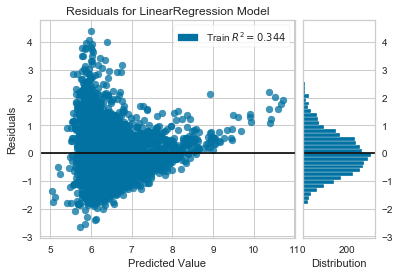

In [334]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
regre = lm.LinearRegression()
visualizer = ResidualsPlot(regre)

visualizer.fit(X, y)  # Fit the training data to the model
#visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

In [335]:
# model with fewer x variables

y1 = m2['imdbscore'] 
X1 = m2[['numvotedusers','duration','numcriticforreviews','numuserforreviews']]

# build a multiple regression model below

# initialize algorithm (ols)
model2 = lm.LinearRegression()

# train algorithm - building model by inserting data (x,y) into the algorithm
model2.fit(X1, y1)   

# generate predicted y - compare with actual y
model2_y = model2.predict(X1)

In [336]:
coef = ["%.3f" % i for i in model2.coef_]
xcolumns = [ i for i in X1.columns ]
list(zip(xcolumns, coef))

[('numvotedusers', '0.000'),
 ('duration', '0.012'),
 ('numcriticforreviews', '0.001'),
 ('numuserforreviews', '-0.001')]

In [337]:
print("mean square error: ", mean_squared_error(y1, model2_y))
print("variance or r-squared: ", explained_variance_score(y1, model2_y))

mean square error:  0.790311619191957
variance or r-squared:  0.284238660114949


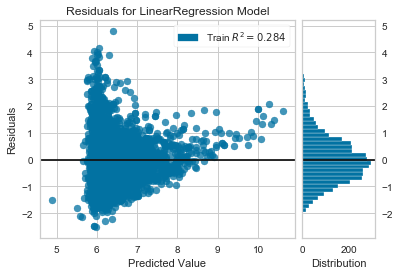

In [338]:
# Instantiate the linear model and visualizer
regre = lm.LinearRegression()
visualizer = ResidualsPlot(regre)

visualizer.fit(X1, y1)  # Fit the training data to the model

visualizer.poof()                 # Draw/show/poof the data

### StatModel

In [339]:
imdb_reg_model = ols("imdbscore~numcriticforreviews+duration+numuserforreviews+numvotedusers+moviefacebooklikes+gross",m2)
imdb_reg = medv_reg_model.fit()
print(imdb_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              imdbscore   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     291.7
Date:                Sun, 08 Dec 2019   Prob (F-statistic):          4.91e-311
Time:                        18:26:09   Log-Likelihood:                -5197.4
No. Observations:                4035   AIC:                         1.041e+04
Df Residuals:                    4028   BIC:                         1.045e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.8312    

In [340]:
imdb_reg.mse_resid

0.771065296105402

In [341]:
imdb_reg.params

Intercept              4.831231e+00
numcriticforreviews    1.610202e-03
duration               1.188546e-02
numuserforreviews     -5.685183e-04
numvotedusers          4.099913e-06
moviefacebooklikes    -3.519492e-06
gross                 -2.561042e-09
dtype: float64

### Ridge

In [342]:
model4 =  lm.Ridge()           
model4.fit(X, y)
model4_y = model4.predict(X)

In [343]:
print('Coefficients: ', model4.coef_)
print("y-intercept ", model4.intercept_)

Coefficients:  [ 2.58821232e-03  1.03688344e-02  3.86932878e-06  7.70612351e-05
  7.75044886e-05 -2.07928590e-09  3.71496785e-06 -7.67332943e-05
 -6.31549914e-04 -2.17187961e-02  7.99011830e-05 -2.03467894e-06]
y-intercept  48.42571916520889


In [344]:
coef4 = ["%.3f" % i for i in model4.coef_]
xcolumns4 = [ i for i in X.columns ]
list(zip(xcolumns4, coef4))

[('numcriticforreviews', '0.003'),
 ('duration', '0.010'),
 ('directorfacebooklikes', '0.000'),
 ('actor3facebooklikes', '0.000'),
 ('actor1facebooklikes', '0.000'),
 ('gross', '-0.000'),
 ('numvotedusers', '0.000'),
 ('casttotalfacebooklikes', '-0.000'),
 ('numuserforreviews', '-0.001'),
 ('titleyear', '-0.022'),
 ('actor2facebooklikes', '0.000'),
 ('moviefacebooklikes', '-0.000')]

In [345]:
print("mean square error: ", mean_squared_error(y, model4_y))
print("variance or r-squared: ", explained_variance_score(y, model4_y))

mean square error:  0.7239156165450112
variance or r-squared:  0.34437151235136065


* The Ridge model produces very similar results to the sklearn regression

* These models do not account for a significant amount of variation in IMDB score as the best model I used was the Ridge regression with an R-squared of just .344
* The numvotedusers, duration, numcriticforreviews, and numuserforreviews account for just over 28% of variation in IMDB score according to the sklearn linear regression model, so the remaining variables are relatively unimportant

# 8. Classification

In [346]:
# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

In [347]:
m2['scorebin'] = pd.cut(m2['imdbscore'], bins=[0, 4, 6, 8, float('Inf')], labels=['Poor', 'OK', 'Good','Excellent'])

In [348]:
m2.head()

numcriticforreviews  duration  directorfacebooklikes  actor3facebooklikes  \
0                723.0     178.0                    0.0                855.0   
1                302.0     169.0                  563.0               1000.0   
2                602.0     148.0                    0.0                161.0   
3                813.0     164.0                22000.0              23000.0   
5                462.0     132.0                  475.0                530.0   

   actor1facebooklikes        gross  numvotedusers  casttotalfacebooklikes  \
0               1000.0  760505847.0         886204                    4834   
1              40000.0  309404152.0         471220                   48350   
2              11000.0  200074175.0         275868                   11700   
3              27000.0  448130642.0        1144337                  106759   
5                640.0   73058679.0         212204                    1873   

   numuserforreviews  titleyear  actor2facebooklikes  imdbscore  \
0             3054.0     2009.0                936.0        7.9   
1             1238.0     2007.0               5000.0        7.1   
2              994.0     2015.0                393.0        6.8   
3             2701.0     2012.0              23000.0        8.5   
5              738.0     2012.0                632.0        6.6   

   moviefacebooklikes   scorebin  
0               33000       Good  
1                   0       Good  
2               85000       Good  
3              164000  Excellent  
5               24000       Good

In [349]:
m3 = m2.drop(['imdbscore'], axis = 1)
m3.head(2)

numcriticforreviews  duration  directorfacebooklikes  actor3facebooklikes  \
0                723.0     178.0                    0.0                855.0   
1                302.0     169.0                  563.0               1000.0   

   actor1facebooklikes        gross  numvotedusers  casttotalfacebooklikes  \
0               1000.0  760505847.0         886204                    4834   
1              40000.0  309404152.0         471220                   48350   

   numuserforreviews  titleyear  actor2facebooklikes  moviefacebooklikes  \
0             3054.0     2009.0                936.0               33000   
1             1238.0     2007.0               5000.0                   0   

  scorebin  
0     Good  
1     Good

In [350]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4035 entries, 0 to 4998
Data columns (total 13 columns):
numcriticforreviews       4035 non-null float64
duration                  4035 non-null float64
directorfacebooklikes     4035 non-null float64
actor3facebooklikes       4035 non-null float64
actor1facebooklikes       4035 non-null float64
gross                     4035 non-null float64
numvotedusers             4035 non-null int64
casttotalfacebooklikes    4035 non-null int64
numuserforreviews         4035 non-null float64
titleyear                 4035 non-null float64
actor2facebooklikes       4035 non-null float64
moviefacebooklikes        4035 non-null int64
scorebin                  4035 non-null category
dtypes: category(1), float64(9), int64(3)
memory usage: 413.9 KB


In [351]:
# declare X variables and y variable

y2 = m3['scorebin']
X2 = m3.drop('scorebin', axis=1)

print(y2.shape, X2.shape)

(4035,) (4035, 12)


In [352]:
#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

# model validation
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.formula.api import ols

### Decision Tree Classifier

In [353]:
# split validation
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt = DecisionTreeClassifier()

# Train a decision tree model
dt1 = dt.fit(X2_train, y2_train)

dt1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [354]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y2_test, dt.predict(X2_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y2_test, dt.predict(X2_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y2_test, dt.predict(X2_test)))
print("--------------------------------------------------------")

0.6845582163501238
--------------------------------------------------------
[[ 30  14   1   0]
 [ 29 620 140  11]
 [  0 150 172  12]
 [  1  12  12   7]]
--------------------------------------------------------
              precision    recall  f1-score   support

   Excellent       0.50      0.67      0.57        45
        Good       0.78      0.78      0.78       800
          OK       0.53      0.51      0.52       334
        Poor       0.23      0.22      0.23        32

    accuracy                           0.68      1211
   macro avg       0.51      0.54      0.52      1211
weighted avg       0.69      0.68      0.68      1211

--------------------------------------------------------


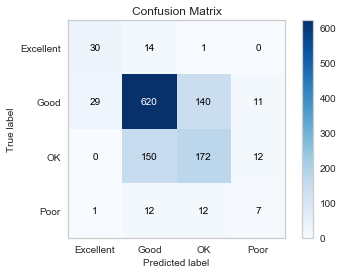

In [355]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y2_test), y_pred=dt.predict(X2_test))
plt.show()

* This model correctly predicts over 68% of the IMDB score categories for these movies. This number could probably be improved, but is not a bad predictor of a movie's score category.

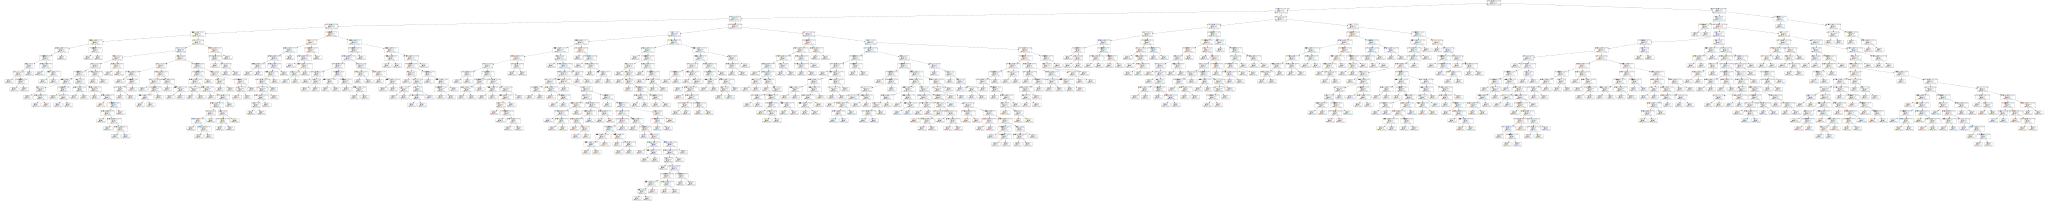

In [356]:
# visualize decision tree

from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt1, out_file=None, feature_names=X2.columns))

* This is a very complicated decision tree

In [357]:
# simpler decision tree

# split validation
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier() 
dt_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Train a decision tree model
dt_simple = dt_simple.fit(X2_train, y2_train)

dt_simple

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [358]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y2_test, dt_simple.predict(X2_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y2_test, dt_simple.predict(X2_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y2_test, dt_simple.predict(X2_test)))
print("--------------------------------------------------------")

0.6994219653179191
--------------------------------------------------------
[[ 22  22   1   0]
 [ 12 652 136   0]
 [  0 161 173   0]
 [  0  14  18   0]]
--------------------------------------------------------
              precision    recall  f1-score   support

   Excellent       0.65      0.49      0.56        45
        Good       0.77      0.81      0.79       800
          OK       0.53      0.52      0.52       334
        Poor       0.00      0.00      0.00        32

    accuracy                           0.70      1211
   macro avg       0.49      0.46      0.47      1211
weighted avg       0.68      0.70      0.69      1211

--------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



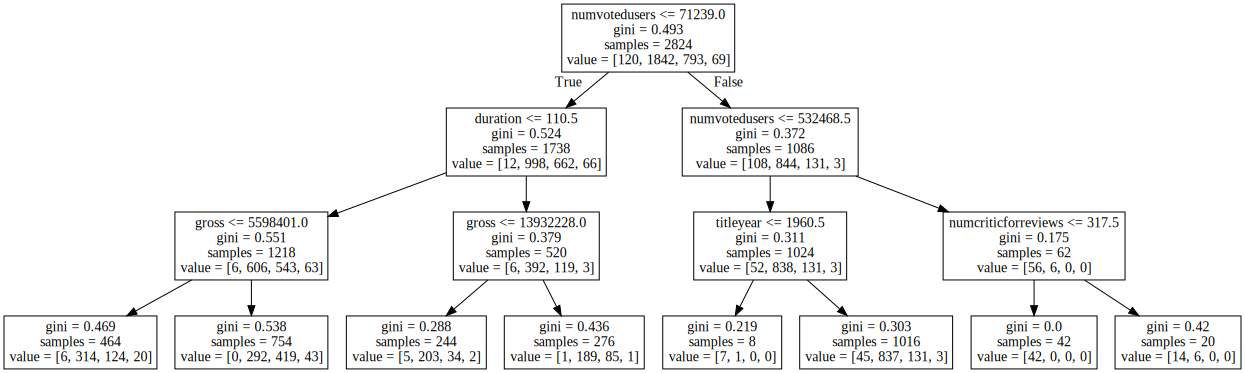

In [359]:
Source( tree.export_graphviz(dt_simple, out_file=None, feature_names=X2.columns))

* This decision tree is much simpler, and also slightly more accurate.

### Random Forest

In [360]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X2_train, y2_train)
clf.score(X2_test, y2_test)

0.7530966143682907

In [361]:
# generate evaluation metrics
print(metrics.accuracy_score(y2_test, clf.predict(X2_test))) #overall accuracy
print(metrics.confusion_matrix(y2_test, clf.predict(X2_test)))
print(metrics.classification_report(y2_test, clf.predict(X2_test)))

0.7530966143682907
[[ 24  21   0   0]
 [  8 723  68   1]
 [  0 170 163   1]
 [  0  15  15   2]]
              precision    recall  f1-score   support

   Excellent       0.75      0.53      0.62        45
        Good       0.78      0.90      0.84       800
          OK       0.66      0.49      0.56       334
        Poor       0.50      0.06      0.11        32

    accuracy                           0.75      1211
   macro avg       0.67      0.50      0.53      1211
weighted avg       0.74      0.75      0.73      1211



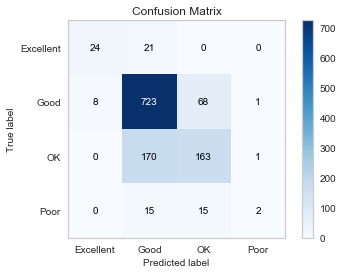

In [362]:
skplt.metrics.plot_confusion_matrix(y_true=np.array(y2_test), y_pred=clf.predict(X2_test))
plt.show()

In [363]:
# feature importance
pd.DataFrame(clf.feature_importances_, index = X2.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

importance
numvotedusers             0.154470
gross                     0.107101
duration                  0.102859
numcriticforreviews       0.091624
numuserforreviews         0.088828
titleyear                 0.074608
directorfacebooklikes     0.068897
casttotalfacebooklikes    0.068323
actor2facebooklikes       0.066245
actor3facebooklikes       0.064777
actor1facebooklikes       0.060673
moviefacebooklikes        0.051594

* The Random Forest model, at over 75%, is more accurate than the DecisionTreeClassifier model 
* Random Forest classifies Excellent and OK movies much more accurately
* The number of users who voted for the movie is the most important feature according to the Random Forest model

### KNN

In [364]:
# split validation
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Initialize KNeighborsClassifier()
knn = KNeighborsClassifier()

# Train a decision tree model
knn = knn.fit(X2_train, y2_train)

In [365]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y2_test, knn.predict(X2_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y2_test, knn.predict(X2_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y2_test, knn.predict(X2_test)))
print("--------------------------------------------------------")

0.634186622625929
--------------------------------------------------------
[[  3  35   7   0]
 [ 12 665 123   0]
 [  3 231 100   0]
 [  0  20  12   0]]
--------------------------------------------------------
              precision    recall  f1-score   support

   Excellent       0.17      0.07      0.10        45
        Good       0.70      0.83      0.76       800
          OK       0.41      0.30      0.35       334
        Poor       0.00      0.00      0.00        32

    accuracy                           0.63      1211
   macro avg       0.32      0.30      0.30      1211
weighted avg       0.58      0.63      0.60      1211

--------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



* The KNN model is the worst of the three models tested here at only 63.4% accuracy. It really struggles to predict movies that fall in a category outside of "Good"

# 9. Clustering

In [366]:
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [367]:
m4 = m2.drop(['scorebin'], axis = 1)
m4.head(2)

numcriticforreviews  duration  directorfacebooklikes  actor3facebooklikes  \
0                723.0     178.0                    0.0                855.0   
1                302.0     169.0                  563.0               1000.0   

   actor1facebooklikes        gross  numvotedusers  casttotalfacebooklikes  \
0               1000.0  760505847.0         886204                    4834   
1              40000.0  309404152.0         471220                   48350   

   numuserforreviews  titleyear  actor2facebooklikes  imdbscore  \
0             3054.0     2009.0                936.0        7.9   
1             1238.0     2007.0               5000.0        7.1   

   moviefacebooklikes  
0               33000  
1                   0

In [368]:
# variance test

m4.var()

numcriticforreviews       1.496706e+04
duration                  4.978320e+02
directorfacebooklikes     8.861422e+06
actor3facebooklikes       3.358555e+06
actor1facebooklikes       2.313561e+08
gross                     4.760153e+15
numvotedusers             2.209345e+10
casttotalfacebooklikes    3.497909e+08
numuserforreviews         1.620759e+05
titleyear                 9.691455e+01
actor2facebooklikes       1.955365e+07
imdbscore                 1.104429e+00
moviefacebooklikes        4.431383e+08
dtype: float64

In [369]:
#http://stackoverflow.com/questions/12525722/normalize-data-in-pandas

# normalize the data

m4_norm = (m4 - m4.mean()) / (m4.max() - m4.min())
m4_norm.head()

numcriticforreviews  duration  directorfacebooklikes  actor3facebooklikes  \
0             0.690756  0.232945              -0.033185             0.005010   
1             0.171644  0.202228              -0.008707             0.011315   
2             0.541558  0.130556              -0.033185            -0.025164   
3             0.801730  0.185163               0.923336             0.967836   
5             0.368931  0.075948              -0.012533            -0.009120   

   actor1facebooklikes     gross  numvotedusers  casttotalfacebooklikes  \
0            -0.010181  0.934418       0.465189               -0.009616   
1             0.050756  0.341258       0.219595                0.056646   
2             0.005444  0.197498       0.103982                0.000839   
3             0.030444  0.523671       0.617956                0.145585   
5            -0.010744  0.030484       0.066305               -0.014125   

   numuserforreviews  titleyear  actor2facebooklikes  imdbscore  \
0           0.540432   0.065018            -0.007288   0.186109   
1           0.181396   0.042546             0.022377   0.082212   
2           0.133156   0.132434            -0.011251   0.043251   
3           0.470641   0.098726             0.153763   0.264031   
5           0.082543   0.098726            -0.009507   0.017277   

   moviefacebooklikes  
0            0.068884  
1           -0.025672  
2            0.217881  
3            0.444242  
5            0.043096

### K-Means

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

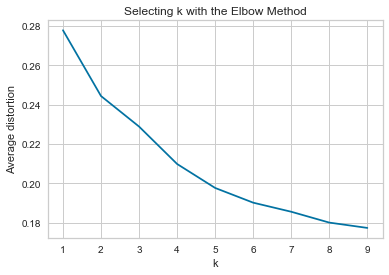

In [370]:
#The Elbow method - optimal K value

#https://www.packtpub.com/big-data-and-business-intelligence/mastering-machine-learning-scikit-learn#

#http://docs.scipy.org/doc/scipy/reference/spatial.distance.html
#Computes distance between each pair of the two collections of inputs
from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(m4_norm) 
    meandistortions.append(sum(np.min(cdist(m4_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / m4_norm.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

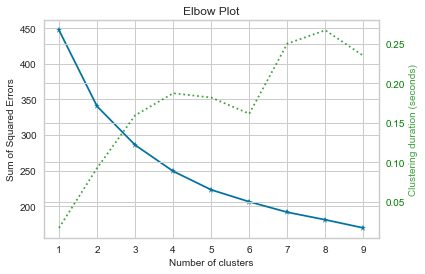

In [371]:
#using scikit-plot python package (https://github.com/reiinakano/scikit-plot)
import scikitplot as skplt

kmeans = KMeans(random_state=1) 
skplt.cluster.plot_elbow_curve(kmeans, m4_norm, cluster_ranges=range(1, 10))

* It looks like the optimal K value would be 5 because the sum of squared errors is lower and it doesn't take any longer to complete the cluster than K = 4 would

In [372]:
# clustering analysis using k-means

k_means = KMeans(init='k-means++', n_clusters=5, random_state=0)

In [373]:
k_means.fit(m4_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [374]:
# cluster labels

k_means.labels_

array([3, 3, 3, ..., 0, 4, 4])

In [375]:
# find out cluster centers

k_means.cluster_centers_

array([[-0.09043909, -0.03807907, -0.02857727, -0.00933714, -0.00395321,
        -0.02918741, -0.04336147, -0.00552673, -0.03271124,  0.0109534 ,
        -0.00640861, -0.1609914 , -0.02222828],
       [ 0.09661636, -0.0012685 , -0.02414782,  0.00266812,  0.00383259,
         0.00216943,  0.00877814,  0.00452026,  0.00819481,  0.06707436,
         0.00369406,  0.03386878,  0.01203478],
       [ 0.10460835,  0.05513729,  0.60811889,  0.03613667,  0.00953379,
         0.05524392,  0.1059442 ,  0.01439381,  0.07036126, -0.03185769,
         0.01504411,  0.10755297,  0.0360482 ],
       [ 0.30349447,  0.0675869 , -0.02049191,  0.06656219,  0.00905547,
         0.17661309,  0.18727973,  0.01778644,  0.15444949,  0.05059416,
         0.02408813,  0.12688059,  0.11238923],
       [-0.08786189,  0.01130273, -0.02597358, -0.01353602, -0.00319581,
        -0.0229233 , -0.0254573 , -0.00498919, -0.02226423, -0.07465052,
        -0.00498976,  0.06385016, -0.02092616]])

In [376]:
# convert cluster lables to dataframe

c = pd.DataFrame(k_means.labels_, columns = ['cluster'])
c.head()

cluster
0        3
1        3
2        3
3        2
4        3

In [377]:
# join m4_norm & c

m4c = m4_norm.join(c)
m4c.head()

numcriticforreviews  duration  directorfacebooklikes  actor3facebooklikes  \
0             0.690756  0.232945              -0.033185             0.005010   
1             0.171644  0.202228              -0.008707             0.011315   
2             0.541558  0.130556              -0.033185            -0.025164   
3             0.801730  0.185163               0.923336             0.967836   
5             0.368931  0.075948              -0.012533            -0.009120   

   actor1facebooklikes     gross  numvotedusers  casttotalfacebooklikes  \
0            -0.010181  0.934418       0.465189               -0.009616   
1             0.050756  0.341258       0.219595                0.056646   
2             0.005444  0.197498       0.103982                0.000839   
3             0.030444  0.523671       0.617956                0.145585   
5            -0.010744  0.030484       0.066305               -0.014125   

   numuserforreviews  titleyear  actor2facebooklikes  imdbscore  \
0           0.540432   0.065018            -0.007288   0.186109   
1           0.181396   0.042546             0.022377   0.082212   
2           0.133156   0.132434            -0.011251   0.043251   
3           0.470641   0.098726             0.153763   0.264031   
5           0.082543   0.098726            -0.009507   0.017277   

   moviefacebooklikes  cluster  
0            0.068884      3.0  
1           -0.025672      3.0  
2            0.217881      3.0  
3            0.444242      2.0  
5            0.043096      3.0

In [378]:
m4c.groupby(['cluster']).mean() 

numcriticforreviews  duration  directorfacebooklikes  \
cluster                                                         
0.0                -0.005946  0.000648              -0.002424   
1.0                 0.014704  0.011780               0.013509   
2.0                 0.043143  0.006182               0.010644   
3.0                 0.106393  0.025908              -0.004251   
4.0                -0.015557 -0.002023              -0.001346   

         actor3facebooklikes  actor1facebooklikes     gross  numvotedusers  \
cluster                                                                      
0.0                -0.001247            -0.000167 -0.002924      -0.000758   
1.0                 0.000959             0.001634  0.016127       0.010302   
2.0                 0.019496             0.003045  0.034073       0.019970   
3.0                 0.035013             0.005125  0.084533       0.046623   
4.0                -0.002342            -0.000538 -0.015267      -0.007370   

         casttotalfacebooklikes  numuserforreviews  titleyear  \
cluster                                                         
0.0                   -0.000196          -0.002823  -0.002918   
1.0                    0.002117           0.008543   0.003423   
2.0                    0.006242           0.012627   0.023212   
3.0                    0.009727           0.049845   0.035947   
4.0                   -0.001105          -0.007141  -0.001045   

         actor2facebooklikes  imdbscore  moviefacebooklikes  
cluster                                                      
0.0                -0.000132  -0.005808           -0.001925  
1.0                 0.001837   0.002002            0.004907  
2.0                 0.008032  -0.013757            0.007076  
3.0                 0.012346   0.006511            0.026661  
4.0                -0.001655  -0.008008           -0.004412

* Difficult to develop profiles based on normalized data, so I will use the original data

In [379]:
m4c2 = m4.join(c)
m4c2.head()

numcriticforreviews  duration  directorfacebooklikes  actor3facebooklikes  \
0                723.0     178.0                    0.0                855.0   
1                302.0     169.0                  563.0               1000.0   
2                602.0     148.0                    0.0                161.0   
3                813.0     164.0                22000.0              23000.0   
5                462.0     132.0                  475.0                530.0   

   actor1facebooklikes        gross  numvotedusers  casttotalfacebooklikes  \
0               1000.0  760505847.0         886204                    4834   
1              40000.0  309404152.0         471220                   48350   
2              11000.0  200074175.0         275868                   11700   
3              27000.0  448130642.0        1144337                  106759   
5                640.0   73058679.0         212204                    1873   

   numuserforreviews  titleyear  actor2facebooklikes  imdbscore  \
0             3054.0     2009.0                936.0        7.9   
1             1238.0     2007.0               5000.0        7.1   
2              994.0     2015.0                393.0        6.8   
3             2701.0     2012.0              23000.0        8.5   
5              738.0     2012.0                632.0        6.6   

   moviefacebooklikes  cluster  
0               33000      3.0  
1                   0      3.0  
2               85000      3.0  
3              164000      2.0  
5               24000      3.0

In [380]:
m4c2.groupby('cluster').size()

cluster
0.0     971
1.0    1027
2.0     154
3.0     269
4.0    1113
dtype: int64

In [381]:
m4c2.groupby('cluster').mean()

numcriticforreviews    duration  directorfacebooklikes  \
cluster                                                           
0.0               157.974253  109.937178             707.523172   
1.0               174.721519  113.198637            1073.968841   
2.0               197.785714  111.558442            1008.077922   
3.0               249.081784  117.338290             665.483271   
4.0               150.179695  109.154537             732.307278   

         actor3facebooklikes  actor1facebooklikes         gross  \
cluster                                                           
0.0               711.075180          7409.201854  4.765191e+07   
1.0               761.811100          8562.155794  6.214031e+07   
2.0              1188.181818          9465.038961  7.578836e+07   
3.0              1545.063197         10796.427509  1.141637e+08   
4.0               685.903863          7172.102426  3.826485e+07   

         numvotedusers  casttotalfacebooklikes  numuserforreviews  \
cluster                                                             
0.0       98886.790937            11020.253347         306.218332   
1.0      117575.068160            12539.082765         363.709834   
2.0      133911.000000            15248.506494         384.363636   
3.0      178946.657993            17537.304833         572.613383   
4.0       87714.450135            10423.335130         284.378257   

           titleyear  actor2facebooklikes  imdbscore  moviefacebooklikes  
cluster                                                                   
0.0      2002.953656          1916.325438   6.422245         8287.584964  
1.0      2003.518014          2186.096397   6.482376        10672.099318  
2.0      2005.279221          3034.740260   6.361039        11429.181818  
3.0      2006.412639          3625.776952   6.517100        18264.319703  
4.0      2003.120395          1707.709793   6.405301         7419.613657

#### Profiles
* Cluster 0: relatively short movies with fewer critic reviews and a relatively high IMDB score relative to number of votes for the movie
* Cluster 1: middle of the pack on the number of critic reviews, fairly high-grossing films, lower amount of Facebook likes, but relatively high IMDB scores on average
* Cluster 2: relatively high number of critic reviews, second highest grossing, higher number of voted users but lower average IMDB score compared to Cluster 1
* Cluster 3: highest amount of critic reviews, longest movies on average, newest movies, highest number of user reviews, high number of votes and Facebook likes, highest grossing cluster
* Cluster 4: fewest critic reviews, fewest user reviews, fewest votes and Facebook likes, second lowest cluster in terms of gross and IMDB score

### Hierarchical Clustering

In [382]:
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=5, linkage='ward').fit(X2)
agg.labels_

array([0, 0, 2, ..., 3, 3, 3], dtype=int64)

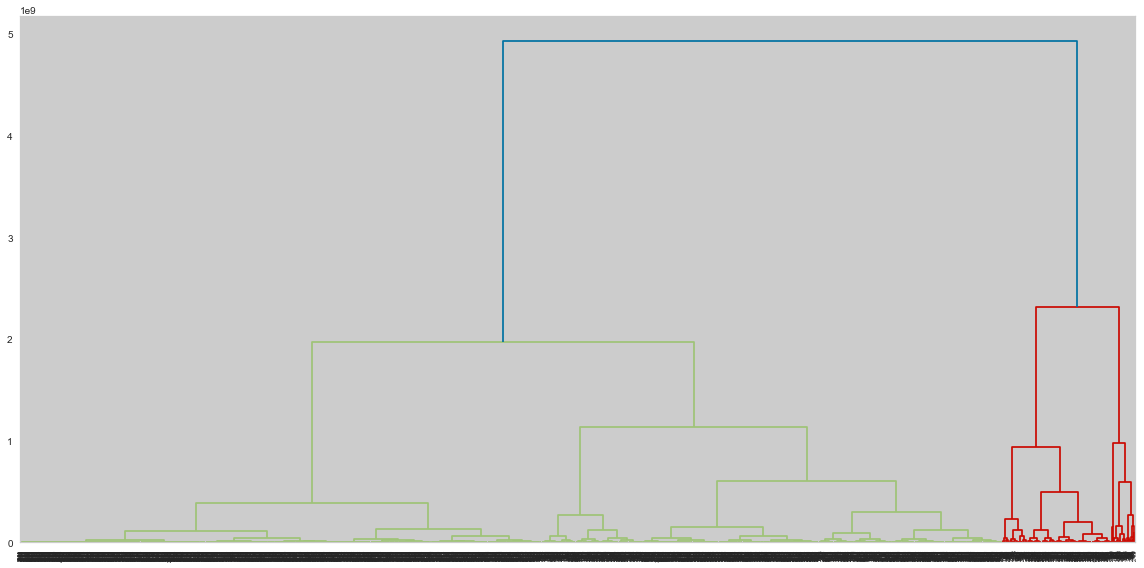

In [383]:
# visualize dendrogram

plt.figure(figsize=(16,8))

linkage_matrix = ward(X2)
dendrogram(linkage_matrix, orientation="top")
plt.tight_layout() # fixes margins

In [384]:
# add cluster label
a = pd.DataFrame(agg.labels_, columns = ['cluster'])
a.head()

cluster
0        0
1        0
2        2
3        0
4        1

In [385]:
a2 = m4.join(a)
a2.head()

numcriticforreviews  duration  directorfacebooklikes  actor3facebooklikes  \
0                723.0     178.0                    0.0                855.0   
1                302.0     169.0                  563.0               1000.0   
2                602.0     148.0                    0.0                161.0   
3                813.0     164.0                22000.0              23000.0   
5                462.0     132.0                  475.0                530.0   

   actor1facebooklikes        gross  numvotedusers  casttotalfacebooklikes  \
0               1000.0  760505847.0         886204                    4834   
1              40000.0  309404152.0         471220                   48350   
2              11000.0  200074175.0         275868                   11700   
3              27000.0  448130642.0        1144337                  106759   
5                640.0   73058679.0         212204                    1873   

   numuserforreviews  titleyear  actor2facebooklikes  imdbscore  \
0             3054.0     2009.0                936.0        7.9   
1             1238.0     2007.0               5000.0        7.1   
2              994.0     2015.0                393.0        6.8   
3             2701.0     2012.0              23000.0        8.5   
5              738.0     2012.0                632.0        6.6   

   moviefacebooklikes  cluster  
0               33000      0.0  
1                   0      0.0  
2               85000      2.0  
3              164000      0.0  
5               24000      0.0

In [386]:
# observations in each cluster
a2.groupby('cluster').size()

cluster
0.0      79
1.0    1184
2.0     380
3.0    1554
4.0     337
dtype: int64

In [387]:
# mean values
a2.groupby('cluster').mean()

numcriticforreviews    duration  directorfacebooklikes  \
cluster                                                           
0.0               314.240506  123.835443            1029.658228   
1.0               165.641047  111.635980             797.755912   
2.0               231.747368  116.576316            1068.421053   
3.0               146.628057  108.351995             692.631918   
4.0               179.750742  114.537092            1279.086053   

         actor3facebooklikes  actor1facebooklikes         gross  \
cluster                                                           
0.0              1790.063291         14244.417722  1.601427e+08   
1.0               898.412162          8318.747466  5.511732e+07   
2.0              1260.157895         10178.878947  1.010839e+08   
3.0               555.212355          6786.120978  3.504941e+07   
4.0               854.753709          8735.198813  7.201626e+07   

         numvotedusers  casttotalfacebooklikes  numuserforreviews  \
cluster                                                             
0.0      250922.797468            22576.088608         779.873418   
1.0      107569.766047            12585.711993         330.095439   
2.0      174687.997368            16213.536842         544.265789   
3.0       80163.263192             9642.282497         269.158945   
4.0      133570.157270            13100.997033         365.189911   

           titleyear  actor2facebooklikes  imdbscore  moviefacebooklikes  
cluster                                                                   
0.0      2007.405063          4341.696203   6.753165        25494.632911  
1.0      2003.804899          2321.648649   6.438767         9302.392736  
2.0      2005.584211          3377.081579   6.432895        17418.581579  
3.0      2002.494208          1469.359717   6.430051         7090.509009  
4.0      2004.166172          2346.397626   6.413650         9711.857567

#### Profiles
* Cluster 0: very small cluster, high number of critic reviews, longer movies, high gross, newest movies, high number of likes and votes, highest IMDB score
* Cluster 1: low number of critic reviews, middle of the pack on average gross, lower number of likes and votes
* Cluster 2: relatively high number of critic and user reviews, high gross, high number of likes and reviews, but very similar IMDB scores to clusters 1, 3, and 4
* Cluster 3: low number of critic reviews, lowest average gross, lowest number of votes, oldest movies, comparable IMDB score
* Cluster 4: relatively low number of reviews, middle of the pack on number of votes, low number of Facebook likes, lowest average IMDB score

### Comparison of K-Means and Hierarchical Clustering
* The two clustering methods are very similar. There are smaller clusters for the movies that are rated better and have more votes/likes. 
* The Hierarchical clustering produced three smaller clusters and two larger clusters, while the K-Means created two smaller clusters and three larger clusters, so the Hierarchical clustering method differentiated the "better" movies more than K-Means did.

# 10. Storytelling - Regression, Classification, and Clustering

#### Regression
* The regression analysis did not provide a ton of explanation for the variance in IMDB scores based on the variables tested. It was clear the the number of critic reviews, number of user reviews, duration, and number of voted users are important factors by accounting for 28% of variation in IMDB scores. Some variation is most likely attributable to actors and directors associated with the movie, as well as the movie's genre, though that amount is unclear.

#### Classification
* The Random Forest classifier provided an accurate classification model. It correctly predicted the IMDB score category over 75% of movies. It is particularly accurate at predicting Good movies (IMDB score 6-8), possibly because that is where the highest number of movies fall, giving the algorithm a very good idea about what kinds of movies fit into that category. While this classification is not overly precise, it can help determine the general reception that a movie receives.
* Random Forest determined that the most important factor in determining IMDB score was the number of users who voted, followed by gross, duration, and the number of critic and user reviews.
* The KNN classifier does not provide as good of a model for this data, only correctly predicting the IMDB score category of around 63% of movies.

#### Clustering
* I chose to divide the movies into 5 clusters, though 4 probably would have been a good number as well. The K-Means clustering algorithm produced two smaller clusters which contained the profiles of the higher-rated movies by IMDB score. Cluster 3 contained the "best" movies as the movies in this cluster have higher numbers of reviews and likes, while also grossing more at the box office. This supports the idea that good movies will make more money than average or bad ones. It also provides a blueprint for what characteristics movies with high IMDB scores have.
* The Hierarchical clustering algorithm contained three smaller clusters, differentiating between the better movies a little more than the K-means algorithm did. This clustering method really provided some information on the best movies - Cluster 0 contains only 79 movies with an average IMDB score of over 6.7 while every other cluster hovered around 6.4. Movies in Cluster 0 clearly have more Facebook likes, user reviews, number of votes, and critic reviews than movies in other clusters. These movies also gross significantly more at the box office. This cluster clearly shows the characteristics of the elite movies in this dataset.

#### Conclusion
* The analysis provided above shows that there are many contributing factors to the IMDB scores that movies receive.
* The Regression, Classification, and Clustering analyses identify what some of those factors are, as well as how much they matter and the amount of attention that the highest-scoring movies receive on IMDB and Facebook. This information can be applied to movies in the future by attempting to predict their success as determined by IMDB scores.

# Resources

* https://plot.ly/python/colorscales/
* https://matplotlib.org/3.1.1/gallery/color/named_colors.html
* https://www.quora.com/How-does-IMDbs-rating-system-work
* https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
* https://community.plot.ly/t/what-colorscales-are-available-in-plotly-and-which-are-the-default/2079
* https://plot.ly/python/getting-started/
* Past homework assignments and labs